# DMHR assignment

<ul>
<li>Student: XGMR1</li>
<li>Assigned city: Portsmouth</li>
</ul>

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandasql import PandaSQL
pdsql = PandaSQL()

# Assignment A - data preparation

In [2]:
# Reading the Postcode Lookup data set
postc = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/postcodes.csv')

In [3]:
# Basic information on dimensionality...
postc.shape

(1756189, 36)

In [4]:
# ...and columns' names
postc.columns

Index(['Postcode 1', 'Postcode 2', 'Postcode 3', 'Date Introduced',
       'User Type', 'Easting', 'Northing', 'Positional Quality', 'County Code',
       'County Name', 'Local Authority Code', 'Local Authority Name',
       'Ward Code', 'Ward Name', 'Country Code', 'Country Name', 'Region Code',
       'Region Name', 'Parliamentary Constituency Code',
       'Parliamentary Constituency Name', 'European Electoral Region Code',
       'European Electoral Region Name', 'Primary Care Trust Code',
       'Primary Care Trust Name', 'Lower Super Output Area Code',
       'Lower Super Output Area Name', 'Middle Super Output Area Code',
       'Middle Super Output Area Name', 'Output Area Classification Code',
       'Output Area Classification Name', 'Longitude', 'Latitude',
       'Spatial Accuracy', 'Last Uploaded', 'Location', 'Socrata ID'],
      dtype='object')

In [5]:
# Printing the first 5 rows to check the structure of the dataset
postc.head(5)

,Postcode 1,Postcode 2,Postcode 3,Date Introduced,User Type,Easting,Northing,Positional Quality,County Code,County Name,...,Middle Super Output Area Code,Middle Super Output Area Name,Output Area Classification Code,Output Area Classification Name,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location,Socrata ID
0,S20 6RU,S20 6RU,S20 6RU,06-1997,0,441432.0,382852.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02001671,NaN,6B3,Suburbanites;Semi-detached suburbia;Semi-detac...,-1.379193,53.340953,Postcode Level,21/09/2017,"(53.340953, -1.379193)",1311804
1,TW4 7BD,TW4 7BD,TW4 7BD,01-1980,0,512373.0,175453.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02000541,NaN,4B1,Multicultural metropolitans;Challenged Asian t...,-0.383652,51.466899,Postcode Level,21/09/2017,"(51.466899, -0.383652)",1630253
2,GU513ZQ,GU51 3ZQ,GU51 3ZQ,05-2003,1,481569.0,155037.0,1,E10000014,Hampshire,...,E02004757,NaN,6B4,Suburbanites;Semi-detached suburbia;Older work...,-0.831674,51.288637,Postcode Level,21/09/2017,"(51.288637, -0.831674)",652126
3,OX4 6BE,OX4 6BE,OX4 6BE,06-2000,0,455440.0,203036.0,1,E10000025,Oxfordshire,...,E02005956,NaN,4A1,Multicultural metropolitans;Rented family livi...,-1.198788,51.723313,Postcode Level,21/09/2017,"(51.723313, -1.198788)",1158807
4,TA7 9JH,TA7 9JH,TA7 9JH,01-1980,0,338745.0,139337.0,1,E10000027,Somerset,...,E02006072,NaN,1A2,Rural residents;Farming communities;Establishe...,-2.877144,51.149999,Postcode Level,21/09/2017,"(51.149999, -2.877144)",1547901


In [6]:
# Replacing spaces by _ in columns names to ease processing
postc.columns = postc.columns.map(lambda x: x.replace(' ', '_'))
postc.columns

Index(['Postcode_1', 'Postcode_2', 'Postcode_3', 'Date_Introduced',
       'User_Type', 'Easting', 'Northing', 'Positional_Quality', 'County_Code',
       'County_Name', 'Local_Authority_Code', 'Local_Authority_Name',
       'Ward_Code', 'Ward_Name', 'Country_Code', 'Country_Name', 'Region_Code',
       'Region_Name', 'Parliamentary_Constituency_Code',
       'Parliamentary_Constituency_Name', 'European_Electoral_Region_Code',
       'European_Electoral_Region_Name', 'Primary_Care_Trust_Code',
       'Primary_Care_Trust_Name', 'Lower_Super_Output_Area_Code',
       'Lower_Super_Output_Area_Name', 'Middle_Super_Output_Area_Code',
       'Middle_Super_Output_Area_Name', 'Output_Area_Classification_Code',
       'Output_Area_Classification_Name', 'Longitude', 'Latitude',
       'Spatial_Accuracy', 'Last_Uploaded', 'Location', 'Socrata_ID'],
      dtype='object')

In [7]:
# Attribute 'Local_Authority_Name' contains the city name (Portsmouth in this case)
# So, we are subsetting the instances pertaining to this particular city
postc_Port = postc[postc['Local_Authority_Name'] == 'Portsmouth']
postc_Port

,Postcode_1,Postcode_2,Postcode_3,Date_Introduced,User_Type,Easting,Northing,Positional_Quality,County_Code,County_Name,...,Middle_Super_Output_Area_Code,Middle_Super_Output_Area_Name,Output_Area_Classification_Code,Output_Area_Classification_Name,Longitude,Latitude,Spatial_Accuracy,Last_Uploaded,Location,Socrata_ID
1100,PO6 3PZ,PO6 3PZ,PO6 3PZ,01-1980,0,464377.0,105797.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003524,NaN,8D2,Hard-pressed living;Migration and churn;Hard-p...,-1.086921,50.848120,Postcode Level,21/09/2017,"(50.84812, -1.086921)",1241059
1478,PO6 2JX,PO6 2JX,PO6 2JX,01-1980,0,466678.0,105475.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003526,NaN,5B3,Urbanites;Ageing urban living;Self-sufficient ...,-1.054300,50.844965,Postcode Level,21/09/2017,"(50.844965, -1.0543)",1240779
1708,PO3 6EJ,PO3 6EJ,PO3 6EJ,01-1980,0,466803.0,100797.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003537,NaN,7A3,Constrained city dwellers;Challenged diversity...,-1.053375,50.802889,Postcode Level,21/09/2017,"(50.802889, -1.053375)",1233874
2526,PO4 8AR,PO4 8AR,PO4 8AR,01-1980,0,465878.0,99670.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003542,NaN,5A3,Urbanites;Urban professionals and families;Fam...,-1.066702,50.792862,Postcode Level,21/09/2017,"(50.792862, -1.066702)",1238854
2783,PO1 3FR,PO1 3FR,PO1 3FR,11-2007,0,463282.0,99924.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003547,NaN,2B2,Cosmopolitans;Inner city students;Multicultura...,-1.103485,50.795434,Postcode Level,21/09/2017,"(50.795434, -1.103485)",1221124
2899,PO1 3GQ,PO1 3GQ,PO1 3GQ,03-2009,0,463227.0,100564.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003539,NaN,4A2,Multicultural metropolitans;Rented family livi...,-1.104155,50.801195,Postcode Level,21/09/2017,"(50.801195, -1.104155)",1221141
3147,PO1 5BU,PO1 5BU,PO1 5BU,02-2003,0,465140.0,100525.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003538,NaN,4A2,Multicultural metropolitans;Rented family livi...,-1.077020,50.800633,Postcode Level,21/09/2017,"(50.800633, -1.07702)",1221427
3258,PO2 8PL,PO2 8PL,PO2 8PL,01-1980,0,464162.0,102841.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003533,NaN,8C1,Hard-pressed living;Hard pressed ageing worker...,-1.090492,50.821566,Postcode Level,21/09/2017,"(50.821566, -1.090492)",1229897
4594,PO5 2QD,PO5 2QD,PO5 2QD,01-1980,0,465055.0,98746.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003548,NaN,2A3,Cosmopolitans;Students around campus;Students ...,-1.078540,50.784647,Postcode Level,21/09/2017,"(50.784647, -1.07854)",1240131
5206,PO5 3ES,PO5 3ES,PO5 3ES,01-1980,0,464314.0,98953.0,1,E99999999,(pseudo) England (UA/MD/LB),...,E02003545,NaN,3C1,Ethnicity central;Ethnic dynamics;Constrained ...,-1.089014,50.786590,Postcode Level,21/09/2017,"(50.78659, -1.089014)",1240234


In [8]:
# As Postcode_(1,2,3) have all the same values, we will be using only Postcode_1 (stored in postc1_Port)
postc1_Port = postc_Port['Postcode_1']
postc1_Port

1100       PO6 3PZ
1478       PO6 2JX
1708       PO3 6EJ
2526       PO4 8AR
2783       PO1 3FR
2899       PO1 3GQ
3147       PO1 5BU
3258       PO2 8PL
4594       PO5 2QD
5206       PO5 3ES
5596       PO5 2RR
5733       PO4 9XX
5786       PO5 4BA
5824       PO4 8AF
6148       PO4 8XZ
6720       PO5 1LT
7136       PO1 3PH
7583       PO4 0LX
8097       PO1 5LY
8171       PO1 9PS
8517       PO5 1DH
8666       PO2 9LD
9241       PO6 2SS
9565       PO1 1PT
9731       PO5 1JL
9900       PO4 0NQ
9961       PO1 3JN
10326      PO1 1LU
10495      PO4 8HU
10869      PO4 8LG
            ...   
1745512    PO3 6EA
1745568    PO2 8AL
1746122    PO5 3NS
1746507    PO4 9EX
1746667    PO6 1EU
1746738    PO1 5AH
1747252    PO5 1AE
1747300    PO4 8RH
1747416    PO3 6BW
1747477    PO5 2LY
1747493    PO1 1QZ
1748495    PO2 8JQ
1748705    PO1 4NH
1749207    PO4 8NN
1749230    PO4 8EY
1750617    PO2 9RJ
1750669    PO6 1JT
1750694    PO6 4SN
1750798    PO6 3FL
1751412    PO4 8XP
1751887    PO1 5HR
1752408    P

In [9]:
# Checking how many rows (postcodes) were retrieved
postc1_Port.shape  

(4444,)

In [10]:
# Reading the Practice data set (without headers as they are not present)
pract = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/practices_Dec2015.csv', header=None)

In [11]:
# Checking dimensionality
pract.shape

(9906, 9)

In [12]:
# Removing any trailing whitespaces in postcodes (column 7) as we will use this column to locate the desired practices
pract.loc[:,7] = pract.loc[:,7].map(lambda x: x.strip())
pract.loc[:,7]

0       TS18 1HU
1       TS18 2AW
2       TS26 8DB
3        TS1 3BE
4       TS14 7DJ
5       TS18 2AT
6       TS24 7PW
7        TS6 6TD
8        TS5 6HF
9       TS24 7PW
10       TS3 6AL
11      TS12 2FF
12      TS23 2LA
13      TS10 1TZ
14       TS1 3QY
15      TS17 0EE
16      TS10 4NW
17       TS3 7RL
18       TS4 3BU
19       TS6 6TD
20      TS12 2TG
21       TS1 2NX
22      TS18 1HU
23       TS5 6HA
24      TS15 9DD
25       TS1 2NX
26       TS1 3RY
27      TS24 7PW
28      TS14 7DJ
29       TS3 6AL
          ...   
9876     WA8 7GD
9877     LS6 2AF
9878    SK10 3BL
9879     LS7 3DR
9880     S70 6QW
9881     L13 4BX
9882     CT1 1WL
9883     CT5 3SE
9884    ME13 8FH
9885     LE1 5WW
9886     NW2 5HA
9887    WS11 5XY
9888     BR1 2FF
9889     OL6 7SR
9890     NW2 1HS
9891    LS11 7DB
9892     SE1 9RT
9893     S72 9HZ
9894    OL16 4AT
9895    OL16 4AT
9896    OL15 8HF
9897     M24 4DZ
9898     HA8 0AP
9899    NE34 0PL
9900     WS3 4LX
9901    WV13 2NY
9902     CV1 4FS
9903    CM16 6

In [13]:
# Column 7 contains the post codes.
# So, we are subsetting the instances pertaining to Portsmouth based on the values stores in postc1_Port.
pract_Port = pract[pract.loc[:,7].isin(postc1_Port)]
pract_Port

,0,1,2,3,4,5,6,7,8
3935,201512,J82004,DR ATCHISON & PARTNERS,QUEENS ROAD SURGERY,8 QUEENS ROAD,BUCKLAND PORTSMOUTH,HAMPSHIRE,PO2 7NX,...
3956,201512,J82028,OSBORNE PRACTICE,THE SURGERY,25 OSBORNE ROAD SOUTHSEA,PORTSMOUTH,HAMPSHIRE,PO5 3ND,...
3963,201512,J82038,THE WOOTTON STREET SURGERY,THE WOOTTON ST SURGERY,1 WOOTTON STREET COSHAM,PORTSMOUTH,HAMPSHIRE,PO6 3AP,...
3976,201512,J82055,CRANESWATER GROUP PRACTICE,THE SURGERY,36 WAVERLEY ROAD SOUTHSEA,PORTSMOUTH,HAMPSHIRE,PO5 2PW,...
3980,201512,J82060,DR TUTTE & PARTNER,SOUTHSEA MEDICAL CENTRE,CARLISLE ROAD,SOUTHSEA,HAMPSHIRE,PO5 1AT,...
3991,201512,J82073,KIRKLANDS SURGERY,KIRKLANDS,111 COPNOR ROAD,COPNOR,PORTSMOUTH HAMPSHIRE,PO3 5AF,...
4002,201512,J82085,LAKE ROAD PRACTICE,LAKE ROAD PRACTICE,NUTFIELD PLACE,PORTSMOUTH,HAMPSHIRE,PO1 4JT,...
4003,201512,J82086,DR KLEMENZ & PARTNERS,NORTHERN ROAD SURGERY,56 NORTHERN ROAD COSHAM,PORTSMOUTH,HAMPSHIRE,PO6 3DS,...
4007,201512,J82090,SUNNYSIDE MEDICAL CENTRE,SUNNYSIDE MEDICAL CENTRE,8F THE POMPEY CENTRE,FRATTON WAY,SOUTHSEA,PO4 8TA,...
4008,201512,J82091,THE BAFFINS SURGERY,THE BAFFINS SURGERY,ST CUTHBERTS CHURCH,HAYLING AVENUE,PORTSMOUTH,PO3 6BH,...


In [14]:
# For those instances, we select Practice ID and name (columns 1 and 2, respectively) and store in a new DataFrame
pract1_Port = pract_Port.loc[:,1:2]
pract1_Port

,1,2
3935,J82004,DR ATCHISON & PARTNERS
3956,J82028,OSBORNE PRACTICE
3963,J82038,THE WOOTTON STREET SURGERY
3976,J82055,CRANESWATER GROUP PRACTICE
3980,J82060,DR TUTTE & PARTNER
3991,J82073,KIRKLANDS SURGERY
4002,J82085,LAKE ROAD PRACTICE
4003,J82086,DR KLEMENZ & PARTNERS
4007,J82090,SUNNYSIDE MEDICAL CENTRE
4008,J82091,THE BAFFINS SURGERY


In [15]:
# Reading the Prescribing data set
presc = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/prescribing_Dec2015.csv')

In [16]:
# Checking dimensionality
presc.shape

(10272116, 11)

In [17]:
# Printing the first 5 rows to check column names
presc.head(5)

,SHA,PCT,PRACTICE,BNF CODE,BNF NAME,ITEMS,NIC,ACT COST,QUANTITY,PERIOD,
0,Q44,RJN,Y05218,0501013K0AAAJAJ,Co-Amoxiclav_Tab 500mg/125mg,1,3.59,3.33,21,201512,
1,Q44,RJN,Y05218,0501130R0AAAAAA,Nitrofurantoin_Cap 50mg,1,14.39,13.42,28,201512,
2,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,1,0.51,0.58,14,201512,
3,Q44,RTV,Y04937,0401020P0AAABAB,Lorazepam_Tab 1mg,1,2.65,2.46,28,201512,
4,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,2,2.01,2.08,84,201512,


In [18]:
# Removing whitespaces from columns names
presc.columns = presc.columns.map(lambda x: x.strip())
#  Replacing spaces by _ in columns names to ease processing
presc.columns = presc.columns.map(lambda x: x.replace(' ', '_'))
presc.columns

Index(['SHA', 'PCT', 'PRACTICE', 'BNF_CODE', 'BNF_NAME', 'ITEMS', 'NIC',
       'ACT_COST', 'QUANTITY', 'PERIOD', ''],
      dtype='object')

In [19]:
# Subsetting this dataset to only those prescriptions pertaining to Porstmouth's practices
# (based on the values stored in pract1_Port)
presc_Port = presc[presc['PRACTICE'].isin(pract1_Port.loc[:,1])]
presc_Port

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
9892998,Q70,10R,J82004,0101010R0BCAAAB,Infacol_Susp 40mg/ml S/F,1,2.71,2.52,50,201512,
9892999,Q70,10R,J82004,0101021B0AAAPAP,Sod Alginate/Pot Bicarb_Tab Chble 500mg,1,11.15,10.42,60,201512,
9893000,Q70,10R,J82004,0101021B0BEADAJ,Gaviscon Infant_Sach 2g (Dual Pack) S/F,2,17.56,16.26,60,201512,
9893001,Q70,10R,J82004,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),13,69.82,64.72,6550,201512,
9893002,Q70,10R,J82004,0101021B0BEBEAL,Gaviscon Advance_Liq (Peppermint) S/F,7,45.54,42.30,4000,201512,
9893003,Q70,10R,J82004,0102000A0AAAAAA,Alverine Cit_Cap 60mg,2,30.39,28.22,156,201512,
9893004,Q70,10R,J82004,0102000A0AAABAB,Alverine Cit_Cap 120mg,2,80.89,74.92,210,201512,
9893005,Q70,10R,J82004,0102000A0BBAAAA,Spasmonal_Cap 60mg,1,16.45,15.22,100,201512,
9893006,Q70,10R,J82004,0102000N0AAABAB,Hyoscine Butylbrom_Tab 10mg,4,19.71,18.47,368,201512,
9893007,Q70,10R,J82004,0102000N0BBAAAB,Buscopan_Tab 10mg,1,6.43,6.06,120,201512,


# Assignment A - question 1
# Listing all prescriptions from Portsmouth's practices

In [20]:
# Extracting PRACTICE, BNF_NAME, ACT_COST and QUANTITY 
presc_Port_items = presc_Port[['PRACTICE','BNF_NAME','ACT_COST','QUANTITY']]
presc_Port_items

,PRACTICE,BNF_NAME,ACT_COST,QUANTITY
9892998,J82004,Infacol_Susp 40mg/ml S/F,2.52,50
9892999,J82004,Sod Alginate/Pot Bicarb_Tab Chble 500mg,10.42,60
9893000,J82004,Gaviscon Infant_Sach 2g (Dual Pack) S/F,16.26,60
9893001,J82004,Gaviscon Advance_Liq (Aniseed) (Reckitt),64.72,6550
9893002,J82004,Gaviscon Advance_Liq (Peppermint) S/F,42.30,4000
9893003,J82004,Alverine Cit_Cap 60mg,28.22,156
9893004,J82004,Alverine Cit_Cap 120mg,74.92,210
9893005,J82004,Spasmonal_Cap 60mg,15.22,100
9893006,J82004,Hyoscine Butylbrom_Tab 10mg,18.47,368
9893007,J82004,Buscopan_Tab 10mg,6.06,120


# Adding Practice's names

In [21]:
# Renaming columns
pract1_Port.columns = ['PRACTICE', 'PRACTICE NAME']
# Merging the datasets with practice and prescription data for Portsmouth
pract_presc_Port = pd.merge(pract1_Port, presc_Port_items, on='PRACTICE')
pract_presc_Port

,PRACTICE,PRACTICE NAME,BNF_NAME,ACT_COST,QUANTITY
0,J82004,DR ATCHISON & PARTNERS,Infacol_Susp 40mg/ml S/F,2.52,50
1,J82004,DR ATCHISON & PARTNERS,Sod Alginate/Pot Bicarb_Tab Chble 500mg,10.42,60
2,J82004,DR ATCHISON & PARTNERS,Gaviscon Infant_Sach 2g (Dual Pack) S/F,16.26,60
3,J82004,DR ATCHISON & PARTNERS,Gaviscon Advance_Liq (Aniseed) (Reckitt),64.72,6550
4,J82004,DR ATCHISON & PARTNERS,Gaviscon Advance_Liq (Peppermint) S/F,42.30,4000
5,J82004,DR ATCHISON & PARTNERS,Alverine Cit_Cap 60mg,28.22,156
6,J82004,DR ATCHISON & PARTNERS,Alverine Cit_Cap 120mg,74.92,210
7,J82004,DR ATCHISON & PARTNERS,Spasmonal_Cap 60mg,15.22,100
8,J82004,DR ATCHISON & PARTNERS,Hyoscine Butylbrom_Tab 10mg,18.47,368
9,J82004,DR ATCHISON & PARTNERS,Buscopan_Tab 10mg,6.06,120


# Total cost and quantity for prescriptions from Portsmouth's practices

In [22]:
# Grouping by PRACTICE to summarize the total cost (summation of ACT_COST) and number of prescriptions
totals_byPractice = pd.DataFrame()
totals_byPractice = pract_presc_Port.groupby('PRACTICE', as_index = False).sum()
totals_byPractice

,PRACTICE,ACT_COST,QUANTITY
0,J82004,65916.49,700351
1,J82028,134913.62,1316550
2,J82038,12745.38,106087
3,J82055,137337.72,1583837
4,J82060,119556.60,1312797
5,J82073,98751.31,863512
6,J82085,234411.31,2204397
7,J82086,60653.71,602141
8,J82090,192237.03,1674721
9,J82091,122174.91,1006491


Text(0,0.5,'Overall cost')

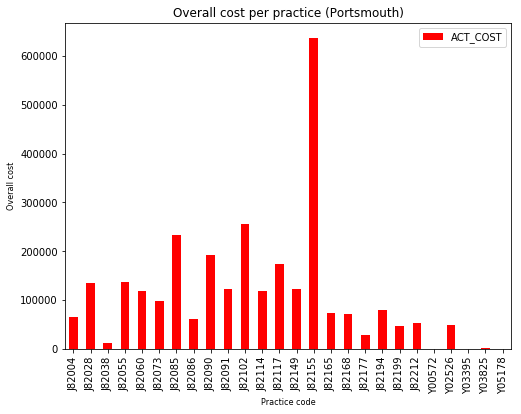

In [23]:
# Plotting the overall cost per practice
ax=totals_byPractice.plot(kind='bar', x='PRACTICE', y='ACT_COST', color=['r', 'g', 'b', 'r', 'g', 'b', 'r'], title='Overall cost per practice (Portsmouth)', figsize=(8,6),legend=True, fontsize=10)
ax.set_xlabel("Practice code",fontsize=8)
ax.set_ylabel("Overall cost",fontsize=8)

# Assignment A - question 2
# Top 10 most/least frequently prescribed medication from Portsmouth's practices

In [24]:
# Finding the top ten most frequently prescribed medications across all practices.
presc_Port_items_top10most = pract_presc_Port.sort_values('QUANTITY', ascending=False).head(10)
presc_Port_items_top10most

,PRACTICE,PRACTICE NAME,BNF_NAME,ACT_COST,QUANTITY
23264,J82155,PORTSDOWN GROUP PRACTICE,Fresubin Energy_Liq (8 Flav),1519.41,221800
23274,J82155,PORTSDOWN GROUP PRACTICE,Fresubin 2kcal_Drink (6 Flav),1760.30,194200
19242,J82117,THE HANWAY GROUP PRACTICE,Fresubin 2kcal_Drink (6 Flav),1450.12,160000
15856,J82102,THE DRAYTON SURGERY,Fresubin 2kcal_Drink (6 Flav),1439.31,158800
22366,J82155,PORTSDOWN GROUP PRACTICE,Paracet_Tab 500mg,3787.37,137168
5984,J82060,DR TUTTE & PARTNER,Fresubin Energy_Liq (8 Flav),879.78,128400
4361,J82055,CRANESWATER GROUP PRACTICE,Fresubin 2kcal_Drink (6 Flav),1158.38,127800
2146,J82028,OSBORNE PRACTICE,Fresubin Energy_Liq (8 Flav),832.92,121600
23234,J82155,PORTSDOWN GROUP PRACTICE,Neocate LCP_Pdr,7850.86,120000
12317,J82090,SUNNYSIDE MEDICAL CENTRE,Fresubin Energy_Liq (8 Flav),764.55,111600


In [25]:
# Finding the top ten least frequently prescribed medications across all practices.
presc_Port_items_top10least = pract_presc_Port.sort_values('QUANTITY', ascending=False).tail(10)
presc_Port_items_top10least

,PRACTICE,PRACTICE NAME,BNF_NAME,ACT_COST,QUANTITY
11067,J82086,DR KLEMENZ & PARTNERS,T & R Sod Bicarb Ear Dps 5% Ear Wax Soft,1.17,1
11066,J82086,DR KLEMENZ & PARTNERS,Limb LimbO Adult Elbow Slim/Med Build Wa,11.99,1
11065,J82086,DR KLEMENZ & PARTNERS,Polyth Ring Pess 50-80mm 7.5mm Thick,1.93,1
3235,J82038,THE WOOTTON STREET SURGERY,Medicareplus Stnd Range Peak Flow Meter,4.17,1
3238,J82038,THE WOOTTON STREET SURGERY,Prontosan Top Irrig 350ml Btl,4.43,1
3243,J82038,THE WOOTTON STREET SURGERY,ReplensMD Vag Moist 35g Tube,5.62,1
3244,J82038,THE WOOTTON STREET SURGERY,Lumecare Hypromellose Eye Dps 0.3% 10ml,1.56,1
19752,J82117,THE HANWAY GROUP PRACTICE,ClikSTAR Blue 3ml 1u (1-80u) Hypod Reusa,23.13,1
19745,J82117,THE HANWAY GROUP PRACTICE,NovoPen Echo Red Pen 3ml 0.5u (0.5-30u),24.85,1
32353,Y05178,PORTSMOUTH PRIMARY CARE ALLIANCE LTD,Aerochamber Plus + Adult/Child/Infant Ma,7.43,1


# Total cost of the top 10 medications against the actual costs of each practice

In [26]:
# Total cost of the top 10 most prescribed medication 
top10most_totalcost = presc_Port_items_top10most['ACT_COST'].sum()
top10most_totalcost

21442.999999999996

In [27]:
# Calculating the overall actual costs of each practice - from the top 10 most prescribed medication
totals_byTop10Most = pd.DataFrame()
totals_byTop10Most = presc_Port_items_top10most.groupby('PRACTICE', as_index=False).sum()
totals_byTop10Most

,PRACTICE,ACT_COST,QUANTITY
0,J82028,832.92,121600
1,J82055,1158.38,127800
2,J82060,879.78,128400
3,J82090,764.55,111600
4,J82102,1439.31,158800
5,J82117,1450.12,160000
6,J82155,14917.94,673168


# How does that compare to the overall actual costs of each practice?

In [28]:
# Some preprocessing to aggregate the overall cost and the cost of each practice into a single dataframe
# Generating a series with the aggregated cost of the top 10 most prescribed medication
top10most_totalcost_s = pd.Series()
limit = totals_byTop10Most['PRACTICE'].count()  # length of the list
for x in range(0,limit):
     top10most_totalcost_s = top10most_totalcost_s.set_value(x, top10most_totalcost)
# Generating a dataframe with costs per practice and the overall cost (top 10 most prescribed medication)
aggregatedCosts = pd.DataFrame()
aggregatedCosts = totals_byTop10Most[['PRACTICE','ACT_COST']]
aggregatedCosts.columns = ['PRACTICE', 'TOTAL_COST_PER_PRACTICE']
aggregatedCosts['TOP10MOST_TOTAL_COST'] = top10most_totalcost_s
aggregatedCosts

,PRACTICE,TOTAL_COST_PER_PRACTICE,TOP10MOST_TOTAL_COST
0,J82028,832.92,21443.0
1,J82055,1158.38,21443.0
2,J82060,879.78,21443.0
3,J82090,764.55,21443.0
4,J82102,1439.31,21443.0
5,J82117,1450.12,21443.0
6,J82155,14917.94,21443.0


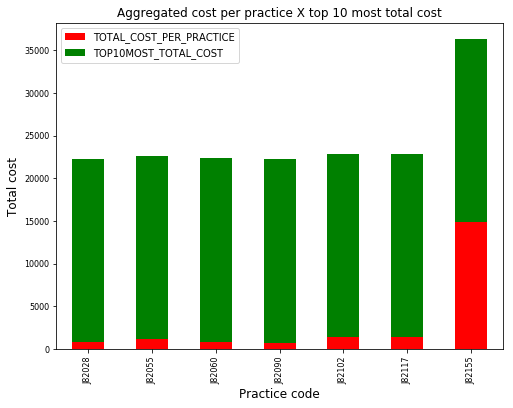

In [29]:
# Plotting the total cost of each practice versus the top 10 most total cost
ax1 = aggregatedCosts.plot(kind='bar', x='PRACTICE', title="Aggregated cost per practice X top 10 most total cost",stacked=True, color=['r', 'g', 'b'], figsize=(8,6), legend=True, fontsize=8)
ax1.set_xlabel("Practice code",fontsize=12)
ax1.set_ylabel("Total cost",fontsize=12)
ax1.legend(loc='upper left')

# How does that compare to the overall actual costs of the entire city?

In [30]:
# Calculating the total cost for the entire city
entireCity_totalcost = totals_byPractice['ACT_COST'].sum()
entireCity_totalcost

2897713.980000001

In [31]:
# Generating a dataframe with costs per practice and the percentual cost related to the entire city
cityCosts = pd.DataFrame()
cityCosts = totals_byTop10Most[['PRACTICE','ACT_COST']]
cityCosts.columns = ['PRACTICE', 'TOTAL_COST_PER_PRACTICE']
cityCosts['PERCENTUAL_ENTIRE_CITY_COST'] = (cityCosts['TOTAL_COST_PER_PRACTICE'] * 100) / entireCity_totalcost
cityCosts

,PRACTICE,TOTAL_COST_PER_PRACTICE,PERCENTUAL_ENTIRE_CITY_COST
0,J82028,832.92,0.028744
1,J82055,1158.38,0.039976
2,J82060,879.78,0.030361
3,J82090,764.55,0.026385
4,J82102,1439.31,0.049671
5,J82117,1450.12,0.050044
6,J82155,14917.94,0.514818


In [32]:
# Total cost of the top 10 least prescribed medication 
top10least_totalcost = presc_Port_items_top10least['ACT_COST'].sum()
top10least_totalcost

86.28

In [33]:
# Calculating the overall actual costs of each practice - top 10 least prescribed medication
totals_byTop10Least = pd.DataFrame()
totals_byTop10Least = presc_Port_items_top10least.groupby('PRACTICE', as_index=False).sum()
totals_byTop10Least

,PRACTICE,ACT_COST,QUANTITY
0,J82038,15.78,4
1,J82086,15.09,3
2,J82117,47.98,2
3,Y05178,7.43,1


# How does that compare to the overall actual costs of each practice?

In [34]:
# Some preprocessing to aggregate the overall cost and the cost of each practice into a single dataframe
# Generating a series with the aggregated cost of the top 10 least prescribed medication
top10least_totalcost_s = pd.Series()
limit = totals_byTop10Least['PRACTICE'].count()  # length of the list
for x in range(0,limit):
     top10least_totalcost_s = top10least_totalcost_s.set_value(x, top10least_totalcost)
# Generating a dataframe with costs per practice and the overall cost (top 10 most prescribed medication)
aggregatedCosts = pd.DataFrame()
aggregatedCosts = totals_byTop10Least[['PRACTICE','ACT_COST']]
aggregatedCosts.columns = ['PRACTICE', 'TOTAL_COST_PER_PRACTICE']
aggregatedCosts['TOP10LEAST_TOTAL_COST'] = top10least_totalcost_s
aggregatedCosts

,PRACTICE,TOTAL_COST_PER_PRACTICE,TOP10LEAST_TOTAL_COST
0,J82038,15.78,86.28
1,J82086,15.09,86.28
2,J82117,47.98,86.28
3,Y05178,7.43,86.28


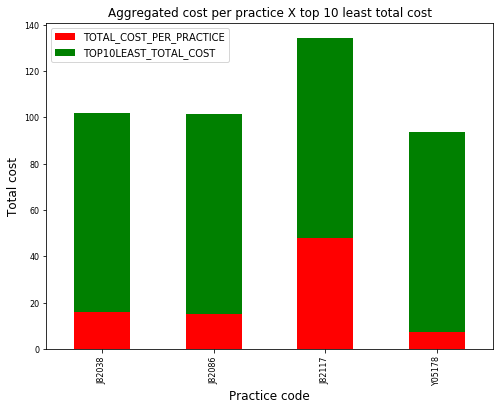

In [35]:
# Plotting the total cost of each practice versus the top 10 least total cost
ax1 = aggregatedCosts.plot(kind='bar', x='PRACTICE', title="Aggregated cost per practice X top 10 least total cost",stacked=True, color=['r', 'g', 'b'], figsize=(8,6), legend=True, fontsize=8)
ax1.set_xlabel("Practice code",fontsize=12)
ax1.set_ylabel("Total cost",fontsize=12)
ax1.legend(loc='upper left')

# How does that compare to the overall actual costs of the entire city?

In [36]:
# Generating a dataframe with costs per practice and the cost for the entire city
cityCosts = pd.DataFrame()
cityCosts = totals_byTop10Least[['PRACTICE','ACT_COST']]
cityCosts.columns = ['PRACTICE', 'TOTAL_COST_PER_PRACTICE']
cityCosts['PERCENTUAL_ENTIRE_CITY_COST'] = (cityCosts['TOTAL_COST_PER_PRACTICE'] * 100) / entireCity_totalcost
cityCosts

,PRACTICE,TOTAL_COST_PER_PRACTICE,PERCENTUAL_ENTIRE_CITY_COST
0,J82038,15.78,0.000545
1,J82086,15.09,0.000521
2,J82117,47.98,0.001656
3,Y05178,7.43,0.000256


# Assignment A - question 3
# Find the top ten most expensive medications and calculate their total actual cost.

In [37]:
# The top 10 most expensive medications
tempdf = presc_Port_items.sort_values('ACT_COST', ascending=False).head(10)
top10most_expensiveMedication = tempdf[['BNF_NAME','ACT_COST','QUANTITY']]
top10most_expensiveMedication

,BNF_NAME,ACT_COST,QUANTITY
9916847,Influenza_Vac Inact 0.5ml Pfs,48771.85,8004
9916848,Imuvac_Vac 0.5ml Pfs,33209.22,5450
9901381,Fostair_Inh 100mcg/6mcg (120D) CFF,9057.78,334
9916232,Neocate LCP_Pdr,7850.86,120000
9915052,Fostair_Inh 100mcg/6mcg (120D) CFF,7511.81,277
9914924,Rivaroxaban_Tab 20mg,7491.79,3855
9915015,Tiotropium_Inha 2.5mcg (60D) CFF + Dev,5607.95,181
9904524,Fostair_Inh 100mcg/6mcg (120D) CFF,5531.90,204
9915072,Fluticasone/Salmeterol_Inh 500/50mcg 60D,4995.45,132
9915847,Linagliptin_Tab 5mg,4462.19,4053


In [38]:
# Total cost of the top 10 most expensive medications (summation of individual ACT_COSTs not considering QUANTITY)
top10most_expensiveMedication['ACT_COST'].sum()

134490.8

# Assignment A - question 4
# How does prescribing (frequency and costs) in your city compare when using prescribing data from Cambridge as a reference?

In [39]:
# Getting postcode data from Cambridge
postc_Cambridge = postc[postc['Local_Authority_Name'] == 'Cambridge']
# As Postcode_(1,2,3) have all the same values, we will be using only Postcode_1 (stored in postc1_Cambridge)
postc1_Cambridge = postc_Cambridge['Postcode_1']
# Subsetting practices pertaining to Cambridge based on the values stores in postc1_Cambridge.
pract_Cambridge = pract[pract.loc[:,7].isin(postc1_Cambridge)]
pract_Cambridge

,0,1,2,3,4,5,6,7,8
1535,201512,D81001,LENSFIELD MEDICAL PRACTICE,LENSFIELD MEDICAL PRAC.,48 LENSFIELD ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1EH,...
1536,201512,D81002,HUNTINGDON ROAD SURGERY,HUNTINGDON ROAD SURGERY,1 HUNTINGDON ROAD,CAMBRIDGE,,CB3 0DB,...
1537,201512,D81003,YORK STREET MEDICAL PRACTICE,YORK STREET MED PRACT.,146-148 YORK STREET,CAMBRIDGE,CAMRIDGESHIRE,CB1 2PY,...
1539,201512,D81005,NEWNHAM WALK SURGERY,NEWNHAM WALK SURGERY,WORDSWORTH GROVE,CAMBRIDGE,CAMBRIDGESHIRE,CB3 9HS,...
1545,201512,D81012,CORNFORD HOUSE SURGERY,CORNFORD HOUSE SURGERY,364 CHERRY HINTON ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB1 8BA,...
1546,201512,D81013,TRUMPINGTON STREET MEDICAL PRACTICE,TRUMPINGTON ST.MED.CTR.,56 TRUMPINGTON STREET,CAMBRIDGE,CAMBRIDGESHIRE,CB2 1RG,...
1549,201512,D81016,ARBURY ROAD SURGERY,ARBURY ROAD SURGERY,114 ARBURY ROAD,CAMBRIDGE,CAMBRIDGESHIRE,CB4 2JG,...
1550,201512,D81017,MILL ROAD SURGERY,279-281 MILL ROAD,,CAMBRIDGE,CAMBRIDGESHIRE,CB1 3DG,...
1558,201512,D81025,CHERRY HINTON MEDICAL CENTRE,CHERRY HINTON MEDICAL CTR,34 FISHERS LANE,CHERRY HINTON,CAMBRIDGE,CB1 9HR,...
1570,201512,D81037,BRIDGE STREET MEDICAL CENTRE,BRIDGE ST MC 2 ALL SAINTS,PASSAGE OFF BRIDGE ST,CAMBRIDGE,,CB2 3LS,...


In [40]:
# For those instances, we select Practice ID and name (columns 1 and 2, respectively) and store in a new DataFrame
pract1_Cambridge = pract_Cambridge.loc[:,1:2]
pract1_Cambridge

,1,2
1535,D81001,LENSFIELD MEDICAL PRACTICE
1536,D81002,HUNTINGDON ROAD SURGERY
1537,D81003,YORK STREET MEDICAL PRACTICE
1539,D81005,NEWNHAM WALK SURGERY
1545,D81012,CORNFORD HOUSE SURGERY
1546,D81013,TRUMPINGTON STREET MEDICAL PRACTICE
1549,D81016,ARBURY ROAD SURGERY
1550,D81017,MILL ROAD SURGERY
1558,D81025,CHERRY HINTON MEDICAL CENTRE
1570,D81037,BRIDGE STREET MEDICAL CENTRE


In [41]:
# Subsetting the prescription dataset to only those prescriptions pertaining to Cambridge's practices
# (based on the values stored in pract1_Cambridge)
presc_Cambridge = presc[presc['PRACTICE'].isin(pract1_Cambridge.loc[:,1])]
presc_Cambridge

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
4409646,Q56,06H,D81001,0101021B0AAAHAH,Alginate_Raft-Forming Oral Susp S/F,5,9.99,9.31,2050,201512,
4409647,Q56,06H,D81001,0101021B0AAALAL,Sod Algin/Pot Bicarb_Susp S/F,5,35.23,33.05,3440,201512,
4409648,Q56,06H,D81001,0101021B0BEACAH,Gaviscon_Liq Orig Aniseed Relief,2,14.43,13.47,1150,201512,
4409649,Q56,06H,D81001,0101021B0BEAFAH,Gaviscon_Liq Relief Peppermint,1,7.11,6.59,600,201512,
4409650,Q56,06H,D81001,0101021B0BEAIAL,Gaviscon Advance_Liq (Aniseed) (Reckitt),2,10.24,9.50,1000,201512,
4409651,Q56,06H,D81001,0101021B0BEAUA0,Gaviscon P/Mint_Tab Chble,1,19.46,18.01,224,201512,
4409652,Q56,06H,D81001,0101021B0BEBEAL,Gaviscon Advance_Liq (Peppermint) S/F,4,54.00,49.98,4200,201512,
4409653,Q56,06H,D81001,0101021B0BIAAAH,Peptac_Liq (Aniseed) S/F,3,5.85,5.45,1500,201512,
4409654,Q56,06H,D81001,0101021B0BIABAH,Peptac_Liq (Peppermint) S/F,1,3.90,3.62,1000,201512,
4409655,Q56,06H,D81001,0102000N0AAABAB,Hyoscine Butylbrom_Tab 10mg,2,15.00,13.90,280,201512,


In [42]:
# Subsetting the Prescription dataset to only relevant columns (BNF_NAME, ACT_COST and QUANTITY)
presc_Cambridge_items = presc_Cambridge[['BNF_NAME','ACT_COST','QUANTITY']]
presc_Cambridge_items

,BNF_NAME,ACT_COST,QUANTITY
4409646,Alginate_Raft-Forming Oral Susp S/F,9.31,2050
4409647,Sod Algin/Pot Bicarb_Susp S/F,33.05,3440
4409648,Gaviscon_Liq Orig Aniseed Relief,13.47,1150
4409649,Gaviscon_Liq Relief Peppermint,6.59,600
4409650,Gaviscon Advance_Liq (Aniseed) (Reckitt),9.50,1000
4409651,Gaviscon P/Mint_Tab Chble,18.01,224
4409652,Gaviscon Advance_Liq (Peppermint) S/F,49.98,4200
4409653,Peptac_Liq (Aniseed) S/F,5.45,1500
4409654,Peptac_Liq (Peppermint) S/F,3.62,1000
4409655,Hyoscine Butylbrom_Tab 10mg,13.90,280


# Top 10 most/least prescribed medication in Cambridge

In [43]:
# Finding the top ten most frequently prescribed medications in Cambridge's practices
presc_Cambridge_items_top10most = presc_Cambridge_items.sort_values('QUANTITY', ascending=False).head(10)
presc_Cambridge_items_top10most

,BNF_NAME,ACT_COST,QUANTITY
4446750,Fortijuce_Liq (7 Flav),1150.99,123200
4475215,Fortisip Compact_Liq (8 Flav),1286.26,86000
4475704,Zerobase Crm (Appl),692.42,71000
4427001,Fortisip Compact_Liq (8 Flav),1039.35,69500
4428437,Peptamen Junior Advance_Liq,977.14,68000
4507124,Fortisip Compact_Liq (8 Flav),1008.74,67500
4474111,Lactulose_Soln 3.1g-3.7g/5ml,390.54,66345
4412002,Nutrison_Soya M/Fibre Liq,1090.93,65072
4433280,Fortisip Compact_Liq (8 Flav),911.71,61000
4490263,Fortisip Bottle_Liq (8 Flav),579.17,60800


In [44]:
# Finding the top ten least frequently prescribed medications in Cambridge's practices
presc_Cambridge_items_top10least = presc_Cambridge_items.sort_values('QUANTITY', ascending=False).tail(10)
presc_Cambridge_items_top10least

,BNF_NAME,ACT_COST,QUANTITY
4508565,Amielle Comfort Vag Dilator Kit,32.64,1
4508564,Almus Sod Chlor 0.9% Nsl Dps,0.93,1
4508563,Mandanol Sod Chlor 0.9% Nsl Dps,0.93,1
4508562,ReplensMD Vag Moist 35g Tube,5.62,1
4508552,Jobst UlcerCARE Med Stkn + 2 x Compress,28.88,1
4508551,iMEDicare SomaCorrect Xtra Vacuum Pump,165.52,1
4508550,Clement Clarke Stnd Range Peak Flow Mete,6.56,1
4508541,LoFric Plus Nelaton Fle 15cm 10-16 (25-P,31.70,1
4508539,Limb LimbO Adult 1/2 Leg Nor Build Water,9.78,1
4557285,Cetraben Crm 500g,5.55,1


# Total costs for Cambridge

In [45]:
#  Total cost of the top 10 most prescribed medication in Cambridge
top10most_totalcost_Cambridge = presc_Cambridge_items_top10most['ACT_COST'].sum()
top10most_totalcost_Cambridge

9127.250000000002

In [46]:
#  Total cost of the top 10 most prescribed medication in Cambridge
top10least_totalcost_Cambridge = presc_Cambridge_items_top10least['ACT_COST'].sum()
top10least_totalcost_Cambridge

288.11

In [47]:
#  Total cost of the entire city (Cambridge)
entireCity_Cambridge_totalcost = presc_Cambridge_items['ACT_COST'].sum()
entireCity_Cambridge_totalcost

1447404.7700000044

# Comparative costs - Portsmouth X Cambridge

In [48]:
# Generating a dataframe to compare Portsmouth and Cambridge medication costs
comparativeCosts = pd.DataFrame({'CITY' : ['Portsmouth', 'Cambridge'],
                                 'COST_ENTIRE_CITY' : [entireCity_totalcost, entireCity_Cambridge_totalcost],
                                 'TOP10_MOST_PRESCRIBED_COST' : [top10most_totalcost, top10most_totalcost_Cambridge],
                                 'TOP10_LEAST_PRESCRIBED_COST' : [top10least_totalcost, top10least_totalcost_Cambridge]
                                })
comparativeCosts

,CITY,COST_ENTIRE_CITY,TOP10_LEAST_PRESCRIBED_COST,TOP10_MOST_PRESCRIBED_COST
0,Portsmouth,2897713.98,86.28,21443.00
1,Cambridge,1447404.77,288.11,9127.25


# Assignment A - question 5
# Using SQL, produce a table that provides the number of GP practices per city, ordered in descending order.

In [49]:
# Renaming columns of the Practice data set to ease processing
pract.columns = ['DATE','PRACTICE_CODE','PRACTICE_NAME1','PRACTICE_NAME2','PRACTICE_STREET','PRACTICE_COUNTY','PRACTICE_CITY','PRACTICE_POSTCODE','PRACT_EXTRA']
pract

,DATE,PRACTICE_CODE,PRACTICE_NAME1,PRACTICE_NAME2,PRACTICE_STREET,PRACTICE_COUNTY,PRACTICE_CITY,PRACTICE_POSTCODE,PRACT_EXTRA
0,201512,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON ON TEES,CLEVELAND,TS18 1HU,...
1,201512,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW,...
2,201512,A81003,VICTORIA MEDICAL PRACTICE,THE HEALTH CENTRE,VICTORIA ROAD,HARTLEPOOL,CLEVELAND,TS26 8DB,...
3,201512,A81004,WOODLANDS ROAD SURGERY,6 WOODLANDS ROAD,,MIDDLESBROUGH,CLEVELAND,TS1 3BE,...
4,201512,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ,...
5,201512,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MED PRACT,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AT,...
6,201512,A81007,BANKHOUSE SURGERY,ONE LIFE HARTLEPOOL,PARK ROAD,HARTLEPOOL,CLEVELAND,TS24 7PW,...
7,201512,A81008,ALBERT HOUSE CLINIC,LOW GRANGE HEALTH VILLAGE,NORMANBY ROAD,MIDDLESBROUGH,CLEVELAND,TS6 6TD,...
8,201512,A81009,VILLAGE MEDICAL CENTRE,THE VILLAGE MEDICAL CTR,400/404 LINTHORPE ROAD,MIDDLESBROUGH,CLEVELAND,TS5 6HF,...
9,201512,A81011,CHADWICK PRACTICE,ONE LIFE HARTLEPOOL,PARK ROAD,HARTLEPOOL,CLEVELAND,TS24 7PW,...


In [50]:
# Retrieving the number of practices per city (from the Practices dataset)
SQLcommand = "SELECT PRACTICE_CITY AS CITY, count(*) AS NUMBER_OF_PRACTICES FROM pract GROUP BY PRACTICE_CITY ORDER BY NUMBER_OF_PRACTICES DESC"
practices_perCity = pdsql(SQLcommand, locals())
practices_perCity

,CITY,NUMBER_OF_PRACTICES
0,,2080
1,LONDON,869
2,ESSEX,410
3,KENT,398
4,LANCASHIRE,339
5,WEST MIDLANDS,314
6,SURREY,278
7,MIDDLESEX,245
8,WEST YORKSHIRE,234
9,CHESHIRE,213


Text(0,0.5,'Number of practices')

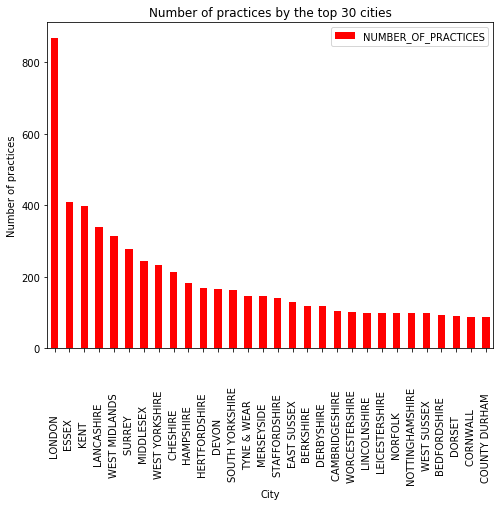

In [51]:
# Removing the first row...
practices_perCity.drop(practices_perCity.index[0], inplace=True)
# ...and plotting the top 30 cities
ax=practices_perCity.head(30).plot(kind='bar', x='CITY', y='NUMBER_OF_PRACTICES', color=['r', 'g', 'b', 'r', 'g', 'b', 'r'], title='Number of practices by the top 30 cities', figsize=(8,6), legend=True, fontsize=10)
ax.set_xlabel("City",fontsize=10)
ax.set_ylabel("Number of practices",fontsize=10)

# Assignment B - data preparation

In [52]:
# Extracting only relevant fields from the Prescription data set
presc_Items = presc[['PRACTICE','PCT','ACT_COST']]
presc_Items

,PRACTICE,PCT,ACT_COST
0,Y05218,RJN,3.33
1,Y05218,RJN,13.42
2,Y04937,RTV,0.58
3,Y04937,RTV,2.46
4,Y04937,RTV,2.08
5,Y04937,RTV,0.63
6,Y04937,RTV,7.41
7,Y04937,RTV,73.46
8,Y04937,RTV,24.51
9,Y04937,RTV,0.64


# Assignment B - question 1
# Calculate the monthly total spending for each GP practice

In [53]:
# Grouping the Prescription data set by PRACTICE (code) and generating the aggregated cost (summation of ACT_COST)
monthlyspending_byPractice = presc_Items.groupby(['PRACTICE'], as_index=False).sum()
monthlyspending_byPractice

,PRACTICE,ACT_COST
0,A81001,83220.57
1,A81002,333514.67
2,A81003,47977.16
3,A81004,147494.85
4,A81005,107669.51
5,A81006,197436.78
6,A81007,141780.85
7,A81008,62463.90
8,A81009,139612.91
9,A81011,188196.12


Text(0,0.5,'Cost per practice')

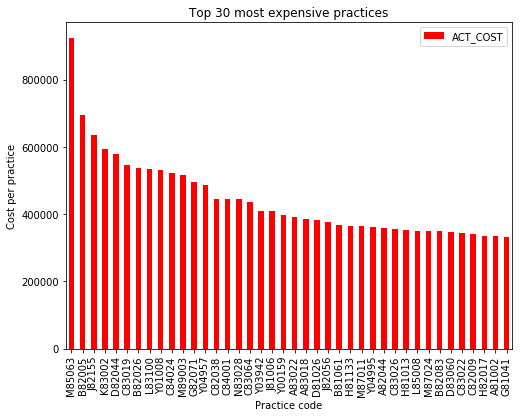

In [54]:
# Sorting GP-Practice monthly expenses and plotting the top 30 most expensive GP-Practices
ax=monthlyspending_byPractice.sort_values('ACT_COST',ascending=False).head(40).plot(kind='bar', x='PRACTICE', y='ACT_COST', color=['r', 'g', 'b', 'r', 'g', 'b', 'r'], title='Top 30 most expensive practices', figsize=(8,6), legend=True, fontsize=10)
ax.set_xlabel("Practice code",fontsize=10)
ax.set_ylabel("Cost per practice",fontsize=10)

# Assignment B - question 2
# Use the number of registered patients in each GP-practice to calculate the relative costs per patient

In [63]:
# Loading the patients registered in each GP practice
patients = pd.read_csv('https://digital.nhs.uk/media/28273/Numbers-of-Patients-Registered-at-a-GP-Practice-Jan-2016-GP-Practice-and-quinary-age-groups/Any/gp-reg-patients-prac-quin-age')

In [64]:
patients.head()

,GP_PRACTICE_CODE,POSTCODE,ONS_CCG_CODE,CCG_CODE,ONS_REGION_CODE,NHSE_REGION_CODE,ONS_COMM_RGN_CODE,NHSE_COMM_REGION_CODE,Total_All,Total_Male,...,Female_50-54,Female_55-59,Female_60-64,Female_65-69,Female_70-74,Female_75-79,Female_80-84,Female_85-89,Female_90-94,Female_95+
0,A81001,TS18 1HU,E38000075,00K,E39000027,Q74,E40000001,Y54,4234,2061,...,162,139,112,134,104,120,94,59,19,7
1,A81002,TS18 2AW,E38000075,00K,E39000027,Q74,E40000001,Y54,19691,9706,...,833,733,634,636,483,445,362,231,106,22
2,A81003,TS26 8DB,E38000075,00K,E39000027,Q74,E40000001,Y54,3357,1779,...,113,100,91,94,49,44,38,18,13,2
3,A81004,TS1 3BE,E38000162,00M,E39000027,Q74,E40000001,Y54,9151,4774,...,277,265,261,228,205,210,165,91,39,17
4,A81005,TS14 7DJ,E38000162,00M,E39000027,Q74,E40000001,Y54,7883,3826,...,287,280,309,368,253,183,144,102,47,20


In [65]:
# Extracting relevant attributes from the GP registered patients data set
patients_Items = patients[['GP_PRACTICE_CODE','Total_All']]
patients_Items.columns = ['PRACTICE','TOTAL_ALL']
patients_Items

,PRACTICE,TOTAL_ALL
0,A81001,4234
1,A81002,19691
2,A81003,3357
3,A81004,9151
4,A81005,7883
5,A81006,12345
6,A81007,9744
7,A81008,4027
8,A81009,9175
9,A81011,11435


In [66]:
# Merging with GP monthly spending data to calculate the cost per patient
monthlyspending_byPracticeTotal = pd.merge(monthlyspending_byPractice, patients_Items, on='PRACTICE')
# Generating a column to record COST_PER_PATIENT
monthlyspending_byPracticeTotal['COST_PER_PATIENT'] = monthlyspending_byPracticeTotal['ACT_COST'] / monthlyspending_byPracticeTotal['TOTAL_ALL']
monthlyspending_byPracticeTotal

,PRACTICE,ACT_COST,TOTAL_ALL,COST_PER_PATIENT
0,A81001,83220.57,4234,19.655307
1,A81002,333514.67,19691,16.937417
2,A81003,47977.16,3357,14.291677
3,A81004,147494.85,9151,16.117894
4,A81005,107669.51,7883,13.658443
5,A81006,197436.78,12345,15.993259
6,A81007,141780.85,9744,14.550580
7,A81008,62463.90,4027,15.511274
8,A81009,139612.91,9175,15.216666
9,A81011,188196.12,11435,16.457903


# Assignment B - question 3
# Visualize the monthly total spending per registered patients for all GP-practices in a scatterplot, show a trend line, and visualize the data for your city within the national scatterplot

Text(0.5,1,'Monthly total spending per registered patients')

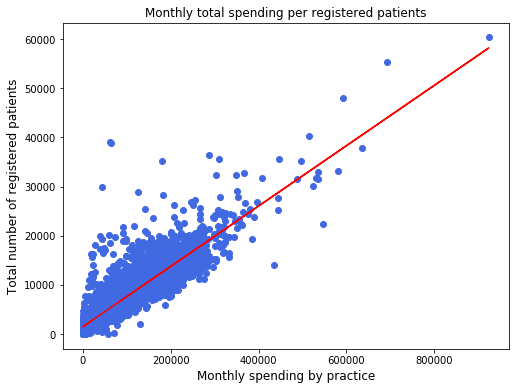

In [67]:
# Plotting the monthly total spending per registered patients in all GPs
# Using ACT_COST as X axis and TOTAL_ALL (number of patients) as Y axis
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= monthlyspending_byPracticeTotal['ACT_COST']
y = monthlyspending_byPracticeTotal['TOTAL_ALL'] 
ax.scatter(x, y, color='royalblue')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_xlabel('Monthly spending by practice',fontsize=12)
ax.set_ylabel('Total number of registered patients',fontsize=12)
ax.set_title('Monthly total spending per registered patients')

Text(0.5,1,'Monthly total spending per registered patients')

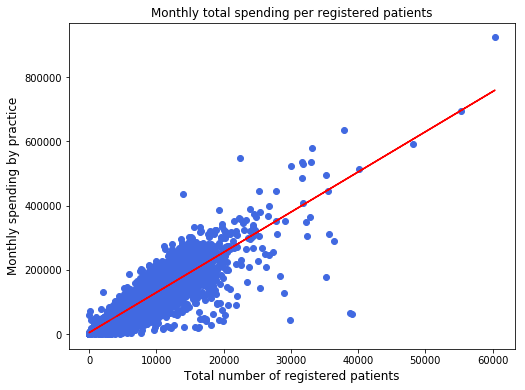

In [68]:
# Plotting the monthly total spending per registered patients in all GPs
# This time, using TOTAL_ALL as X axis and ACT_COST as Y axis to compare with the previous figure
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= monthlyspending_byPracticeTotal['TOTAL_ALL']
y = monthlyspending_byPracticeTotal['ACT_COST'] 
ax.scatter(x, y, color='royalblue')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_xlabel('Total number of registered patients',fontsize=12)
ax.set_ylabel('Monthly spending by practice',fontsize=12)
ax.set_title('Monthly total spending per registered patients')

# Assignment B - question 4
# Visualize the relative costs per patient of all national GP-practices in a histogram.

In [69]:
# Basic statistics about COST_PER_PATIENT, mainly to check the range of values
monthlyspending_byPracticeTotal['COST_PER_PATIENT'].describe()

count     7701.000000
mean        21.317316
std        665.570655
min          0.001872
25%         10.689451
50%         13.212266
75%         15.504289
max      58319.780000
Name: COST_PER_PATIENT, dtype: float64

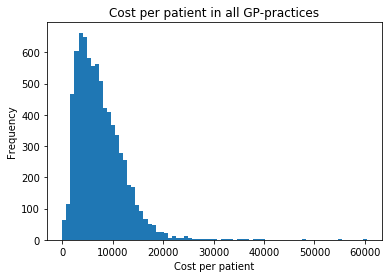

In [70]:
# Plotting a histogram of COST_PER_PATIENT using an arbitrary number of bins
values = monthlyspending_byPracticeTotal['COST_PER_PATIENT'].values
plt.hist(x, bins=75)
plt.xlabel("Cost per patient")
plt.ylabel("Frequency")
plt.title('Cost per patient in all GP-practices')
plt.show()

In [71]:
# This command is not part of the answer. It was introduced to show some possible outliers, as the two first rows 
# (top 2 most expensive practices) have only one registered patient with a high ACT_COST
# Sorting monthly spending by practice based on the COST_PER_PATIENT
monthlyspending_byPracticeTotal.sort_values('COST_PER_PATIENT',ascending=False)

,PRACTICE,ACT_COST,TOTAL_ALL,COST_PER_PATIENT
2550,E87723,58319.78,1,58319.780000
3543,G82651,3358.69,1,3358.690000
7452,Y01924,71547.74,112,638.819107
7607,Y02873,4960.98,20,248.049000
7458,Y02045,626.88,4,156.720000
7673,Y04786,42525.74,316,134.575127
7503,Y02507,240.47,2,120.235000
7504,Y02508,1218.17,15,81.211333
7322,Y00054,6008.38,77,78.030909
7507,Y02511,46873.16,710,66.018535


# Assignment B - question 5
# Use descriptive statistics to show how your assigned city compares to the national level.

In [72]:
# Basic statistics on Portsmouth ACT_COSTs
values_Portsmouth = pd.Series(totals_byPractice['ACT_COST'].describe())
values_Portsmouth

count        26.000000
mean     111450.537692
std      127785.979491
min         672.530000
25%       47560.837500
50%       77212.865000
75%      132151.630000
max      635726.910000
Name: ACT_COST, dtype: float64

In [73]:
# Basic statistics on ACT_COSTs at national level
values_National = pd.Series(monthlyspending_byPracticeTotal['ACT_COST'].describe())
values_National

count      7701.000000
mean      97573.645499
std       65787.154710
min           2.410000
25%       47714.240000
50%       84448.530000
75%      133552.730000
max      923786.260000
Name: ACT_COST, dtype: float64

In [74]:
# Comparative ACT_COSTs (Portsmouth x National level)
comparativeCosts = pd.DataFrame(values_Portsmouth.index, columns=['Metrics'])
comparativeCosts.insert(1,'Portsmouth', values_Portsmouth.values)
comparativeCosts.insert(2,'National',values_National.values)
comparativeCosts

,Metrics,Portsmouth,National
0,count,26.000000,7701.000000
1,mean,111450.537692,97573.645499
2,std,127785.979491,65787.154710
3,min,672.530000,2.410000
4,25%,47560.837500,47714.240000
5,50%,77212.865000,84448.530000
6,75%,132151.630000,133552.730000
7,max,635726.910000,923786.260000


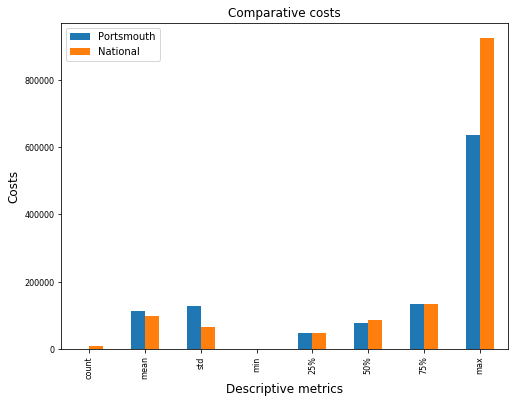

In [75]:
# Plotting comparative costs between Portsmouth and the entire country
ax1 = comparativeCosts.plot(kind='bar', x='Metrics', title="Comparative costs", figsize=(8,6), legend=True, fontsize=8)
ax1.set_xlabel("Descriptive metrics",fontsize=12)
ax1.set_ylabel("Costs",fontsize=12)
ax1.legend(loc='upper left')

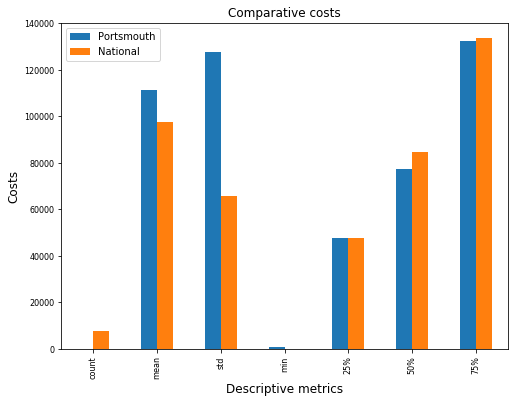

In [76]:
# This command was hardcoded to improve the visualisation.
# As max differs significantly from the other metrics, we are removing it and plotting again
comparativeCosts.drop(comparativeCosts.index[7], inplace=True)
# Still difficult to visualize count and min against the other metrics
ax1 = comparativeCosts.plot(kind='bar', x='Metrics', title="Comparative costs", figsize=(8,6), legend=True, fontsize=8)
ax1.set_xlabel("Descriptive metrics",fontsize=12)
ax1.set_ylabel("Costs",fontsize=12)
ax1.legend(loc='upper left')

In [77]:
# Portsmouth's overall cost (summation of ACT_COST) 
entireCity_totalcost

2897713.980000001

In [78]:
# National level entire cost (summation of ACT_COST)
monthlyspending_byPracticeTotal['ACT_COST'].sum()

751414643.99

# Assignment C - question 1
# Identify for all GP-practices the relative costs per patient for all statin prescriptions (simvastatin, atorvastatin, rosuvastatin, pravastatin, fluvastatin) by using the dataset from December 2015.

In [79]:
# Filtering rows containing statin prescriptions from the Prescriptions dataset
presc_statin = presc[presc['BNF_NAME'].str.contains('statin')]
presc_statin

,SHA,PCT,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,NIC,ACT_COST,QUANTITY,PERIOD,
102,Q44,RXA,Y00327,0212000B0AAACAC,Atorvastatin_Tab 40mg,2,1.67,1.67,29,201512,
103,Q44,RXA,Y00327,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.10,0.20,3,201512,
274,Q44,RXA,Y00327,0502030B0AAABAB,Nystatin_Oral Susp 100 000u/ml,10,25.90,24.08,300,201512,
512,Q44,RXA,Y04109,0502030B0AAABAB,Nystatin_Oral Susp 100 000u/ml,1,2.59,2.41,30,201512,
647,Q44,RY7,N85638,0212000B0AAABAB,Atorvastatin_Tab 20mg,1,0.70,0.76,14,201512,
648,Q44,RY7,N85638,0212000B0AAACAC,Atorvastatin_Tab 40mg,1,0.06,0.17,1,201512,
650,Q44,RY7,N85638,0212000X0AAAAAA,Pravastatin Sod_Tab 10mg,1,0.29,0.38,7,201512,
651,Q44,RY7,N85638,0212000Y0AAADAD,Simvastatin_Tab 40mg,4,1.47,1.71,37,201512,
870,Q44,RY7,N85638,0502030B0AAABAB,Nystatin_Oral Susp 100 000u/ml,10,28.49,26.47,330,201512,
1166,Q44,RY7,N85645,0212000Y0AAADAD,Simvastatin_Tab 40mg,1,0.28,0.37,7,201512,


In [80]:
# Subsetting to relevant fields
presc_statin = presc_statin[['PRACTICE','BNF_CODE','BNF_NAME','ITEMS','ACT_COST','QUANTITY']]
presc_statin

,PRACTICE,BNF_CODE,BNF_NAME,ITEMS,ACT_COST,QUANTITY
102,Y00327,0212000B0AAACAC,Atorvastatin_Tab 40mg,2,1.67,29
103,Y00327,0212000Y0AAABAB,Simvastatin_Tab 20mg,1,0.20,3
274,Y00327,0502030B0AAABAB,Nystatin_Oral Susp 100 000u/ml,10,24.08,300
512,Y04109,0502030B0AAABAB,Nystatin_Oral Susp 100 000u/ml,1,2.41,30
647,N85638,0212000B0AAABAB,Atorvastatin_Tab 20mg,1,0.76,14
648,N85638,0212000B0AAACAC,Atorvastatin_Tab 40mg,1,0.17,1
650,N85638,0212000X0AAAAAA,Pravastatin Sod_Tab 10mg,1,0.38,7
651,N85638,0212000Y0AAADAD,Simvastatin_Tab 40mg,4,1.71,37
870,N85638,0502030B0AAABAB,Nystatin_Oral Susp 100 000u/ml,10,26.47,330
1166,N85645,0212000Y0AAADAD,Simvastatin_Tab 40mg,1,0.37,7


From https://data.gov.uk/dataset/prescribing-by-gp-practice-presentation-level/resource/b692513c-c063-4822-a0a4-4b6612578f66

For each practice in England, including GP Practices, the following information is presented at presentation level for each medicine, dressing and appliance, (by presentation name):

<ul>
<li>the total number of items prescribed and dispensed
<li>the total net ingredient cost
<li>the total actual cost
<li>the total quantity
</ul>

So, assuming that COST_PER_PATIENT will be ACT_COST / TOTAL_ALL

In [81]:
# Calculating COST_PER_PATIENT for all statin prescriptions for each practice
# summation of all ACT_COSTs related to statin prescriptions / number of patients (TOTAL_ALL)
statin_totalsByPractice = pd.DataFrame()
statin_totalsByPractice = presc_statin.groupby('PRACTICE', as_index = False)['ACT_COST'].sum()
statin_totalsByPractice

,PRACTICE,ACT_COST
0,A81001,1816.80
1,A81002,6530.36
2,A81003,868.39
3,A81004,2139.41
4,A81005,1891.93
5,A81006,5022.25
6,A81007,2252.79
7,A81008,1398.07
8,A81009,1614.59
9,A81011,2953.01


In [82]:
# Merging with Patient_items (assignment B, question 2) to get the number of patients registered in each GP-Practice
statin_totalsByPractice = pd.merge(statin_totalsByPractice, patients_Items, on='PRACTICE')
statin_totalsByPractice

,PRACTICE,ACT_COST,TOTAL_ALL
0,A81001,1816.80,4234
1,A81002,6530.36,19691
2,A81003,868.39,3357
3,A81004,2139.41,9151
4,A81005,1891.93,7883
5,A81006,5022.25,12345
6,A81007,2252.79,9744
7,A81008,1398.07,4027
8,A81009,1614.59,9175
9,A81011,2953.01,11435


In [83]:
# Generating COST_PER_PATIENT for all statin prescriptions
statin_totalsByPractice['COST_PER_PATIENT_STATIN'] = statin_totalsByPractice['ACT_COST'] / statin_totalsByPractice['TOTAL_ALL']
statin_totalsByPractice

,PRACTICE,ACT_COST,TOTAL_ALL,COST_PER_PATIENT_STATIN
0,A81001,1816.80,4234,0.429098
1,A81002,6530.36,19691,0.331642
2,A81003,868.39,3357,0.258680
3,A81004,2139.41,9151,0.233790
4,A81005,1891.93,7883,0.240001
5,A81006,5022.25,12345,0.406825
6,A81007,2252.79,9744,0.231198
7,A81008,1398.07,4027,0.347174
8,A81009,1614.59,9175,0.175977
9,A81011,2953.01,11435,0.258243


# Assignment C - question 2
# Identify for all GP-practice the associated Index of Multiple Deprivation (IMD) for each GP-Practice in your assigned city.

In [84]:
# Loading the Deprivation by postcode dataset
depriv_byPostcode = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/deprivation-by-postcode.csv')
depriv_byPostcode

,Postcode,Postcode Status,LSOA code,LSOA Name,Index of Multiple Deprivation Rank,Index of Multiple Deprivation Decile,Income Rank,Income Decile,Income Score,Employment Rank,...,Barriers to Housing and Services Rank,Barriers to Housing and Services Decile,Living Environment Rank,Living Environment Decile,IDACI Rank,IDACI Decile,IDACI Score,IDAOPI Rank,IDAOPI Decile,IDAOPI Score
0,TS18 1HU,Live,E01033477,Stockton-on-Tees 014G E01033477,73.0,1.0,196.0,1.0,0.474,123.0,...,20035.0,7.0,2868.0,1.0,2226.0,1.0,0.422,817.0,1.0,0.500
1,TS18 2AW,Live,E01012267,Stockton-on-Tees 014F E01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
2,TS26 8DB,Live,E01011999,Hartlepool 007D E01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.481,2268.0,1.0,0.409
3,TS1 3BE,Live,E01012068,Middlesbrough 001A E01012068,1914.0,1.0,3124.0,1.0,0.306,6166.0,...,16397.0,5.0,4060.0,2.0,2212.0,1.0,0.422,948.0,1.0,0.488
4,TS14 7DJ,Live,E01012117,Redcar and Cleveland 018A E01012117,7082.0,3.0,5343.0,2.0,0.252,4058.0,...,31777.0,10.0,19703.0,6.0,6666.0,3.0,0.300,5907.0,2.0,0.299
5,TS18 2AT,Live,E01012267,Stockton-on-Tees 014F E01012267,551.0,1.0,433.0,1.0,0.434,215.0,...,25114.0,8.0,16862.0,6.0,4415.0,2.0,0.354,427.0,1.0,0.552
6,TS24 7PW,Live,E01011999,Hartlepool 007D E01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.481,2268.0,1.0,0.409
7,TS6 6TD,Live,E01033470,Redcar and Cleveland 022G E01033470,664.0,1.0,520.0,1.0,0.422,274.0,...,27372.0,9.0,24413.0,8.0,1126.0,1.0,0.477,1840.0,1.0,0.429
8,TS5 6HF,Live,E01012078,Middlesbrough 005A E01012078,2155.0,1.0,1945.0,1.0,0.343,2629.0,...,25935.0,8.0,2454.0,1.0,659.0,1.0,0.510,3897.0,2.0,0.349
9,TS24 7PW,Live,E01011999,Hartlepool 007D E01011999,967.0,1.0,746.0,1.0,0.402,678.0,...,27634.0,9.0,6264.0,2.0,1071.0,1.0,0.481,2268.0,1.0,0.409


In [85]:
# Removing trailing spaces from Postcode values 
depriv_byPostcode['Postcode'] = depriv_byPostcode['Postcode'].map( lambda x: x.strip() )

In [86]:
# Subsetting to only relevant columns
depriv_byPostcode2 = depriv_byPostcode[['Postcode','LSOA Name','Index of Multiple Deprivation Rank']]
depriv_byPostcode2.columns = ('Postcode','LSOA_Name','IMD_Rank')
depriv_byPostcode2

,Postcode,LSOA_Name,IMD_Rank
0,TS18 1HU,Stockton-on-Tees 014G E01033477,73.0
1,TS18 2AW,Stockton-on-Tees 014F E01012267,551.0
2,TS26 8DB,Hartlepool 007D E01011999,967.0
3,TS1 3BE,Middlesbrough 001A E01012068,1914.0
4,TS14 7DJ,Redcar and Cleveland 018A E01012117,7082.0
5,TS18 2AT,Stockton-on-Tees 014F E01012267,551.0
6,TS24 7PW,Hartlepool 007D E01011999,967.0
7,TS6 6TD,Redcar and Cleveland 022G E01033470,664.0
8,TS5 6HF,Middlesbrough 005A E01012078,2155.0
9,TS24 7PW,Hartlepool 007D E01011999,967.0


In [87]:
# Filtering IMD ranks for the assigned city (Portsmouth)...
IMD_Portsmouth = depriv_byPostcode2[depriv_byPostcode2.LSOA_Name.str.startswith('Portsmouth').fillna(False)]
# ... and subsetting to only relevant fields
IMD_Portsmouth = IMD_Portsmouth[['Postcode','IMD_Rank']]
IMD_Portsmouth

,Postcode,IMD_Rank
3935,PO2 7NX,7230.0
3956,PO5 3ND,9600.0
3963,PO6 3AP,6572.0
3976,PO5 2PW,11378.0
3980,PO5 1AT,254.0
3991,PO3 5AF,11092.0
4002,PO1 4JT,1257.0
4003,PO6 3DS,6572.0
4007,PO4 8TA,8953.0
4008,PO3 6BH,19103.0


In [88]:
# Inserting relevant columns from the Practices dataset
IMD_Portsmouth.insert(2,'PRACTICE', pract_Port.iloc[:,1].values)
IMD_Portsmouth.insert(3,'PRACTICE_NAME', pract_Port.iloc[:,2].values)
IMD_Portsmouth

,Postcode,IMD_Rank,PRACTICE,PRACTICE_NAME
3935,PO2 7NX,7230.0,J82004,DR ATCHISON & PARTNERS
3956,PO5 3ND,9600.0,J82028,OSBORNE PRACTICE
3963,PO6 3AP,6572.0,J82038,THE WOOTTON STREET SURGERY
3976,PO5 2PW,11378.0,J82055,CRANESWATER GROUP PRACTICE
3980,PO5 1AT,254.0,J82060,DR TUTTE & PARTNER
3991,PO3 5AF,11092.0,J82073,KIRKLANDS SURGERY
4002,PO1 4JT,1257.0,J82085,LAKE ROAD PRACTICE
4003,PO6 3DS,6572.0,J82086,DR KLEMENZ & PARTNERS
4007,PO4 8TA,8953.0,J82090,SUNNYSIDE MEDICAL CENTRE
4008,PO3 6BH,19103.0,J82091,THE BAFFINS SURGERY


Text(0,0.5,'IMD')

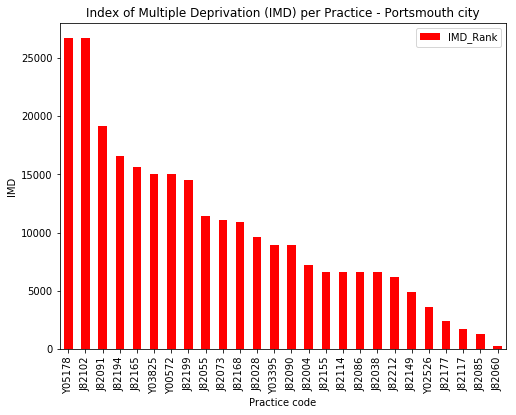

In [89]:
# Sorting by IMD_Rank and plotting
ax=IMD_Portsmouth.sort_values('IMD_Rank', ascending=False).plot(kind='bar', x='PRACTICE', y='IMD_Rank', color=['r', 'g', 'b', 'r', 'g', 'b', 'r'], title='Index of Multiple Deprivation (IMD) per Practice - Portsmouth city', figsize=(8,6), legend=True, fontsize=10)
ax.set_xlabel("Practice code",fontsize=10)
ax.set_ylabel("IMD",fontsize=10)

# Assignment C - question 3

# Use the entire national dataset and identify the lowest relative spenders of statins from the first decile and the highest relative spenders of statins from the last decile. Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD). Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

In [90]:
# Sorting the dataset by COST_PER_PATIENT_STATIN to further calculate deciles
statin_totalsByPractice_sorted = statin_totalsByPractice.sort_values('COST_PER_PATIENT_STATIN', ascending=True)
statin_totalsByPractice_sorted

,PRACTICE,ACT_COST,TOTAL_ALL,COST_PER_PATIENT_STATIN
1661,C88627,14.97,29880,0.000501
916,B86110,20.23,39138,0.000517
7656,Y04942,4.82,7817,0.000617
7642,Y03671,2.60,3543,0.000734
2568,E87768,8.45,10971,0.000770
7189,P88633,2.83,3239,0.000874
5575,M82612,2.19,2308,0.000949
6385,N81607,2.85,2676,0.001065
2788,F81720,4.68,3272,0.001430
6653,N85643,2.66,1779,0.001495


In [91]:
# Generating deciles for COST_PER_PATIENT_STATIN
statin_totalsByPractice['DECILES'] = pd.qcut(statin_totalsByPractice['COST_PER_PATIENT_STATIN'], 10, labels=["first", "2", "3", "4", "5", "6", "7", "8", "9", "last"])
# Groups of interest will be labeled as 'first' and 'last'
statin_totalsByPractice

,PRACTICE,ACT_COST,TOTAL_ALL,COST_PER_PATIENT_STATIN,DECILES
0,A81001,1816.80,4234,0.429098,last
1,A81002,6530.36,19691,0.331642,9
2,A81003,868.39,3357,0.258680,7
3,A81004,2139.41,9151,0.233790,6
4,A81005,1891.93,7883,0.240001,6
5,A81006,5022.25,12345,0.406825,last
6,A81007,2252.79,9744,0.231198,6
7,A81008,1398.07,4027,0.347174,9
8,A81009,1614.59,9175,0.175977,3
9,A81011,2953.01,11435,0.258243,7


In [92]:
# Grouping by DECILES to retrieve 'first' and 'last' groups, with corresponding GP Practice codes
# Lowest group
lowest_StatinSpenders = statin_totalsByPractice.groupby('DECILES').get_group('first')
lowest_StatinSpenders

,PRACTICE,ACT_COST,TOTAL_ALL,COST_PER_PATIENT_STATIN,DECILES
70,A81621,180.39,2245,0.080352,first
74,A81630,17.86,712,0.025084,first
76,A81632,31.51,664,0.047455,first
77,A81633,11.69,917,0.012748,first
78,A81634,32.48,1533,0.021187,first
142,A82613,65.50,967,0.067735,first
146,A82623,582.79,5271,0.110565,first
164,A83011,3198.48,28350,0.112821,first
211,A83068,0.89,164,0.005427,first
254,A84025,50.34,5296,0.009505,first


In [93]:
# Highest group
highest_StatinSpenders = statin_totalsByPractice.groupby('DECILES').get_group('last')
highest_StatinSpenders

,PRACTICE,ACT_COST,TOTAL_ALL,COST_PER_PATIENT_STATIN,DECILES
0,A81001,1816.80,4234,0.429098,last
5,A81006,5022.25,12345,0.406825,last
22,A81025,1868.30,4162,0.448895,last
57,A81066,1638.63,4281,0.382768,last
63,A81608,1109.36,2955,0.375418,last
72,A81623,1288.78,1740,0.740678,last
89,A82014,1735.20,4259,0.407420,last
123,A82050,3773.50,7134,0.528946,last
133,A82065,1512.97,2939,0.514791,last
151,A82647,1143.45,2407,0.475052,last


Now determine for all identified GP-practices for both groups (lowest and the highest) the associated Index of Multiple Deprivation (IMD).
Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

In [94]:
# Retrieving Practice_code and Postcode from Pract dataset
prac_Postcode = pd.DataFrame(pract.index, columns=['INDEX'])
prac_Postcode.insert(1, 'PRACTICE', pract['PRACTICE_CODE'].values)
prac_Postcode.insert(2, 'POSTCODE', pract['PRACTICE_POSTCODE'].values)
prac_Postcode = prac_Postcode.drop('INDEX', axis=1)
prac_Postcode

,PRACTICE,POSTCODE
0,A81001,TS18 1HU
1,A81002,TS18 2AW
2,A81003,TS26 8DB
3,A81004,TS1 3BE
4,A81005,TS14 7DJ
5,A81006,TS18 2AT
6,A81007,TS24 7PW
7,A81008,TS6 6TD
8,A81009,TS5 6HF
9,A81011,TS24 7PW


In [95]:
# Merging with lowest statin spenders
lowest_StatinSpenders_Total = pd.merge(prac_Postcode, lowest_StatinSpenders, on='PRACTICE')
lowest_StatinSpenders_Total = lowest_StatinSpenders_Total[['PRACTICE','POSTCODE','DECILES']]
lowest_StatinSpenders_Total

,PRACTICE,POSTCODE,DECILES
0,A81621,TS3 9NB,first
1,A82613,LA21 8ER,first
2,A82623,CA14 2RW,first
3,A83011,DH1 1QW,first
4,A83068,SR8 4PF,first
5,A84025,NE23 6QN,first
6,A86003,NE1 8DQ,first
7,A86007,NE2 1JQ,first
8,A86027,NE1 7XR,first
9,B81032,HU1 3SA,first


In [96]:
# Merging with highest statin spenders
highest_StatinSpenders_Total = pd.merge(prac_Postcode, highest_StatinSpenders, on='PRACTICE')
highest_StatinSpenders_Total = highest_StatinSpenders_Total[['PRACTICE','POSTCODE','DECILES']]
highest_StatinSpenders_Total

,PRACTICE,POSTCODE,DECILES
0,A81001,TS18 1HU,last
1,A81006,TS18 2AT,last
2,A81025,TS18 1HU,last
3,A81066,TS21 1JS,last
4,A81608,TS17 6NP,last
5,A81623,TS18 2EP,last
6,A82014,CA7 8DS,last
7,A82050,CA14 2AJ,last
8,A82065,LA11 7JY,last
9,A82647,LA11 6PH,last


In [97]:
# Merging with depriv_byPostcode2 to get IMD for both groups.
# ... lowest statin spenders
lowest_StatinSpenders_Total = pd.merge(lowest_StatinSpenders_Total, depriv_byPostcode2, left_on='POSTCODE', right_on='Postcode')
lowest_StatinSpenders_Total = lowest_StatinSpenders_Total[['PRACTICE','POSTCODE','DECILES','IMD_Rank']]
lowest_StatinSpenders_Total

,PRACTICE,POSTCODE,DECILES,IMD_Rank
0,A81621,TS3 9NB,first,376.0
1,A82613,LA21 8ER,first,17679.0
2,A82623,CA14 2RW,first,3099.0
3,A82623,CA14 2RW,first,3099.0
4,A83011,DH1 1QW,first,23986.0
5,A83068,SR8 4PF,first,6877.0
6,A84025,NE23 6QN,first,15790.0
7,A84025,NE23 6QN,first,15790.0
8,A86003,NE1 8DQ,first,16382.0
9,A86007,NE2 1JQ,first,27274.0


In [98]:
# ...highest statin spenders
highest_StatinSpenders_Total = pd.merge(highest_StatinSpenders_Total, depriv_byPostcode2, left_on='POSTCODE', right_on='Postcode')
highest_StatinSpenders_Total = highest_StatinSpenders_Total[['PRACTICE','POSTCODE','DECILES','IMD_Rank']]
highest_StatinSpenders_Total

,PRACTICE,POSTCODE,DECILES,IMD_Rank
0,A81001,TS18 1HU,last,73.0
1,A81001,TS18 1HU,last,73.0
2,A81001,TS18 1HU,last,73.0
3,A81001,TS18 1HU,last,73.0
4,A81025,TS18 1HU,last,73.0
5,A81025,TS18 1HU,last,73.0
6,A81025,TS18 1HU,last,73.0
7,A81025,TS18 1HU,last,73.0
8,A81006,TS18 2AT,last,551.0
9,A81006,TS18 2AT,last,551.0


# Use these two groups to assess whether the IMD-score differs. Use descriptive statistics for your answer.

In [99]:
# Generating descriptive statistics for lowest and highest statin spenders
IMD_scores_lowest = pd.Series(lowest_StatinSpenders_Total['IMD_Rank'].describe())
IMD_scores_highest = pd.Series(highest_StatinSpenders_Total['IMD_Rank'].describe())

In [100]:
# Generating a dataframe to aggregate statistics on IMD_scores
comparative_IMD_scores = pd.DataFrame(IMD_scores_lowest.index, columns=['Metrics'])
comparative_IMD_scores.insert(1,'Lowest', IMD_scores_lowest.values)
comparative_IMD_scores.insert(2,'Highest',IMD_scores_highest.values)
comparative_IMD_scores

,Metrics,Lowest,Highest
0,count,1145.000000,1051.000000
1,mean,10724.144978,12485.258801
2,std,8763.185845,9262.804132
3,min,27.000000,66.000000
4,25%,3629.000000,4173.000000
5,50%,8493.000000,10707.000000
6,75%,16382.000000,19917.000000
7,max,32837.000000,32701.000000


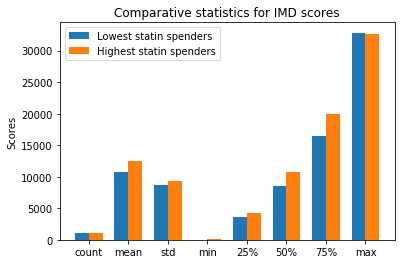

In [101]:
# Plotting IMD_score statistics

N = 8  # number of metrics of interest
dl = comparative_IMD_scores['Lowest']  # lowest IMD_scores
dh = comparative_IMD_scores['Highest'] # highest IMD_scores

ind = np.arange(N) # indice range for x axis
width = 0.35 

plt.bar(ind, dl, width, label='Lowest statin spenders')
plt.bar(ind + width, dh, width, label='Highest statin spenders')
plt.ylabel('Scores')
plt.title('Comparative statistics for IMD scores')
plt.xticks(ind + width / 2, comparative_IMD_scores['Metrics']) # labels for x axis
plt.legend(loc='best')
plt.show()

# Assignment C - question 4

# Identify for all GP-practices the associated nine English regions. Identify for each region the associated 75 mortality rate for cardiovascular diseases for the year 2015.

In [102]:
# Retrieving region codes from the Postcode dataset 
region_Codes = pd.DataFrame(postc['Region_Code'].unique())
region_Codes.columns = ['REGION_CODE']
region_Codes

,REGION_CODE
0,E12000003
1,E12000007
2,E12000008
3,E12000009
4,E12000006
5,S99999999
6,E12000004
7,E12000002
8,W99999999
9,E12000001


From the NHSOF_Domain_1_S.pdf document:<br>
https://beta.digital.nhs.uk/binaries/content/documents/corporate-website/publication-system/clinical-indicators/nhs-outcomes-framework/current/domain-1-preventing-people-from-dying-prematurely-nof/1-1-under-75-mortality-rate-from-cardiovascular-disease/1-1-under-75-mortality-rate-from-cardiovascular-disease/publicationsystem%3AFiles-v3%5B3%5D/publicationsystem%3AattachmentResource
<br><br>
English Lower Super Output Area (LSOA).
<br>
Rationale: This restricts data to patients resident in England.
A valid English LSOA starts with the letter ‘E’.

In [103]:
# We are interested only on the region codes from England (starting with E)
region_Codes = region_Codes[region_Codes['REGION_CODE'].str.startswith('E').fillna(False)]
region_Codes

,REGION_CODE
0,E12000003
1,E12000007
2,E12000008
3,E12000009
4,E12000006
6,E12000004
7,E12000002
9,E12000001
10,E12000005


In [104]:
# Filtering the Postcode dataset to only those England region codes (based on region_Codes)...
post_RegionCodes = postc[postc['Region_Code'].isin(region_Codes.values)]
# ...and subsetting to only relevant fields
post_RegionCodes = post_RegionCodes[['Postcode_1','Region_Code']]
post_RegionCodes.columns = [['POSTCODE','REGION_CODE']]
post_RegionCodes

,POSTCODE,REGION_CODE
0,S20 6RU,E12000003
1,TW4 7BD,E12000007
2,GU513ZQ,E12000008
3,OX4 6BE,E12000008
4,TA7 9JH,E12000009
5,CO124PS,E12000006
7,LE4 4LU,E12000004
8,SG180BW,E12000006
9,CM2 7FH,E12000006
10,CT119AA,E12000008


In [105]:
# Merging with prac_Postcode (Assignment C, question 3) to get PRACTICE code
# This dataset will be further linked with the Under 75 CVD mortality rates dataset to answer this question.
post_RegionCodes = pd.merge(post_RegionCodes, prac_Postcode, on='POSTCODE')
post_RegionCodes

,POSTCODE,REGION_CODE,PRACTICE
0,DL1 5LW,E12000001,A83641
1,LU3 3EP,E12000006,E81054
2,WF6 2EP,E12000003,B87041
3,NE8 1RQ,E12000001,A85005
4,DT4 0HB,E12000009,J81090
5,B69 1RZ,E12000005,M88005
6,E15 2JA,E12000007,F84749
7,TA2 8QY,E12000009,L85006
8,LN9 6QP,E12000004,C83605
9,CV6 1HS,E12000005,M86018


For this specific question, some data cleansing and standardization is needed, as some postcodes have no spaces, others have, in the NHSOF dataset.<br>
We need to remove blank spaces from the POSTCODE attributes in all datasets to be linked with the NHSOF one.

In [106]:
# Removing blank spaces from POSTCODE
post_RegionCodes['POSTCODE'] = post_RegionCodes['POSTCODE'].map(lambda x: x.replace(' ', ''))
post_RegionCodes

,POSTCODE,REGION_CODE,PRACTICE
0,DL15LW,E12000001,A83641
1,LU33EP,E12000006,E81054
2,WF62EP,E12000003,B87041
3,NE81RQ,E12000001,A85005
4,DT40HB,E12000009,J81090
5,B691RZ,E12000005,M88005
6,E152JA,E12000007,F84749
7,TA28QY,E12000009,L85006
8,LN96QP,E12000004,C83605
9,CV61HS,E12000005,M86018


# Data preparation to the Under 75 CVD mortality rates dataset

In [107]:
# Loading the Under 75 CVD mortality rates dataset
under75cvd = pd.read_csv('https://s3.eu-west-2.amazonaws.com/dmhr-data/NHSOF_1.1_I00656_D.csv')
under75cvd

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
0,2016,1/1/2016 to 31/12/2016,England,England,England,Person,All,72.7,71.9,73.5,"33,816","50,798,600"
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"
2,2014,1/1/2014 to 31/12/2014,England,England,England,Person,All,73.8,73,74.6,"32,895","49,941,800"
3,2013,1/1/2013 to 31/12/2013,England,England,England,Person,All,76.6,75.7,77.4,"33,408","49,584,200"
4,2012,1/1/2012 to 31/12/2012,England,England,England,Person,All,77.7,76.8,78.5,"33,258","49,281,700"
5,2011,1/1/2011 to 31/12/2011,England,England,England,Person,All,80.5,79.6,81.3,"33,783","48,969,700"
6,2010,1/1/2010 to 31/12/2010,England,England,England,Person,All,89.5,88.6,90.4,"37,155","48,569,300"
7,2009,1/1/2009 to 31/12/2009,England,England,England,Person,All,91.8,90.9,92.7,"37,480","48,183,900"
8,2008,1/1/2008 to 31/12/2008,England,England,England,Person,All,98.8,97.8,99.8,"39,590","47,839,700"
9,2007,1/1/2007 to 31/12/2007,England,England,England,Person,All,103.9,102.9,104.9,"40,842","47,442,600"


In [108]:
# Filtering the dataset to the year of interest (2015)
under75cvd_2015 = under75cvd[under75cvd['Year'] == 2015]
under75cvd_2015

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
1,2015,1/1/2015 to 31/12/2015,England,England,England,Person,All,74,73.3,74.8,"33,664","50,360,500"
30,2015,1/1/2015 to 31/12/2015,England,England,England,Female,All,46.5,45.6,47.4,"10,835","25,186,400"
31,2015,1/1/2015 to 31/12/2015,England,England,England,Female,0 to 4,1.7,1.1,2.4,28,"1,674,300"
32,2015,1/1/2015 to 31/12/2015,England,England,England,Female,5 to 9,0.4,0.2,0.9,7,"1,638,600"
33,2015,1/1/2015 to 31/12/2015,England,England,England,Female,10 to 14,0.3,0.1,0.7,4,"1,465,100"
34,2015,1/1/2015 to 31/12/2015,England,England,England,Female,15 to 19,0.8,0.4,1.3,12,"1,562,800"
35,2015,1/1/2015 to 31/12/2015,England,England,England,Female,20 to 24,1.6,1.1,2.4,29,"1,759,800"
36,2015,1/1/2015 to 31/12/2015,England,England,England,Female,25 to 29,2.2,1.6,3,42,"1,870,600"
37,2015,1/1/2015 to 31/12/2015,England,England,England,Female,30 to 34,4.7,3.7,5.7,87,"1,870,100"
38,2015,1/1/2015 to 31/12/2015,England,England,England,Female,35 to 39,7.5,6.2,8.9,130,"1,740,300"


In [109]:
# Filtering the dataset by region (Breakdown == 'Region')
under75cvd_2015 = under75cvd_2015[under75cvd_2015['Breakdown'].str.match('Region')]
under75cvd_2015

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator
471,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500"
472,2015,1/1/2015 to 31/12/2015,Region,E12000006,East of England,Person,All,66.3,64.1,68.5,"3,505","5,541,600"
473,2015,1/1/2015 to 31/12/2015,Region,E12000007,London,Person,All,76.7,74.3,79.1,"4,037","8,208,700"
474,2015,1/1/2015 to 31/12/2015,Region,E12000001,North East,Person,All,86,82.3,89.9,"2,000","2,399,000"
475,2015,1/1/2015 to 31/12/2015,Region,E12000002,North West,Person,All,88.3,86,90.7,"5,413","6,590,500"
476,2015,1/1/2015 to 31/12/2015,Region,E12000008,South East,Person,All,60.8,59,62.5,"4,669","8,171,900"
477,2015,1/1/2015 to 31/12/2015,Region,E12000009,South West,Person,All,64.5,62.3,66.7,"3,316","4,934,700"
478,2015,1/1/2015 to 31/12/2015,Region,E12000005,West Midlands,Person,All,77.9,75.4,80.4,"3,780","5,274,400"
479,2015,1/1/2015 to 31/12/2015,Region,E12000003,Yorkshire and The Humber,Person,All,82.8,80.2,85.5,"3,773","4,950,200"
597,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Female,All,49,46.1,52.1,"1,030","2,144,400"


In [110]:
# Removing trailing spaces from the attribute Level to allow for merging...
under75cvd_2015['Level'] = under75cvd_2015['Level'].map(lambda x: x.replace(' ',''))

/Users/marcosebarreto/Applications/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [111]:
# Merging with post_RegionCodes to aggregate information on practice code, region code and
# under 75 CVD mortality rate (Indicator value attribute)
under75cvd_2015 = pd.merge(under75cvd_2015, post_RegionCodes, left_on='Level', right_on='REGION_CODE')
under75cvd_2015

,Year,Period of coverage,Breakdown,Level,Level description,Gender,Age,Indicator value,Lower CI,Upper CI,Numerator,Denominator,POSTCODE,REGION_CODE,PRACTICE
0,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",LN96QP,E12000004,C83605
1,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",S402AB,E12000004,C81012
2,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",DE75AN,E12000004,C81604
3,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",DE61RR,E12000004,C81086
4,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",NN67TT,E12000004,K83053
5,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",NN26LS,E12000004,K83003
6,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",LE45LJ,E12000004,Y00280
7,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",LE38NF,E12000004,C82008
8,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",NG16GN,E12000004,Y03743
9,2015,1/1/2015 to 31/12/2015,Region,E12000004,East Midlands,Person,All,76.7,74,79.4,"3,171","4,289,500",NG57BQ,E12000004,C84055


# Practice code, region code and associated under 75 CVD mortality rate

In [112]:
# Subsetting to only relevant fields
under75cvd_2015 = under75cvd_2015[['PRACTICE','REGION_CODE','Indicator value']]
under75cvd_2015.columns = [['PRACTICE','REGION_CODE','UNDER_75_CVD_MORTALITY_RATE']]
under75cvd_2015

,PRACTICE,REGION_CODE,UNDER_75_CVD_MORTALITY_RATE
0,C83605,E12000004,76.7
1,C81012,E12000004,76.7
2,C81604,E12000004,76.7
3,C81086,E12000004,76.7
4,K83053,E12000004,76.7
5,K83003,E12000004,76.7
6,Y00280,E12000004,76.7
7,C82008,E12000004,76.7
8,Y03743,E12000004,76.7
9,C84055,E12000004,76.7


# Under 75 CVD mortality rate for the nine England regions

For this part, we concentrate only on REGION_CODE and UNDER_75_CVD_MORTALITY_RATE.<br>
So, the resolution:<br>
1) generates a dataframe with these two attributes (REGION_CODE and UNDER_75_CVD_MORTALITY_RATE).<br>
2) for each nine England region, assumes the mean value for UNDER_75_CVD_MORTALITY_RATE.<br>
2.1) this attribute has type 'object' in the NHSOF dataset, so we need to convert to a numeric type.
3) generates a specific dataframe to store the mean Under 75 CVD mortality rate and plot

In [113]:
# Generating a dataframe with REGION_CODE and UNDER_75_CVD_MORTALITY_RATE to calculate mean CVD mortality rate
under75cvd_2015_ENregions = under75cvd_2015[['REGION_CODE','UNDER_75_CVD_MORTALITY_RATE']]
under75cvd_2015_ENregions

,REGION_CODE,UNDER_75_CVD_MORTALITY_RATE
0,E12000004,76.7
1,E12000004,76.7
2,E12000004,76.7
3,E12000004,76.7
4,E12000004,76.7
5,E12000004,76.7
6,E12000004,76.7
7,E12000004,76.7
8,E12000004,76.7
9,E12000004,76.7


In [114]:
# Converting the data type of UNDER_75_CVD_MORTALITY_RATE from string to numeric
under75cvd_2015_ENregions['UNDER_75_CVD_MORTALITY_RATE'] = under75cvd_2015_ENregions['UNDER_75_CVD_MORTALITY_RATE'].apply(pd.to_numeric)

/Users/marcosebarreto/Applications/miniconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [115]:
# Calculating the mean value for UNDER_75_CVD_MORTALITY_RATE for each of the nine England regions
# ...and storing in a specific dataset 
under75cvd_2015_mean = under75cvd_2015_ENregions.groupby('REGION_CODE', as_index = False)['UNDER_75_CVD_MORTALITY_RATE'].mean()

Text(0,0.5,'Under 75 CVD mortality')

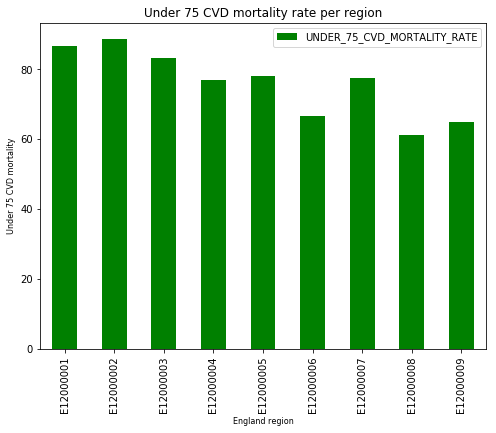

In [116]:
# Plotting the mean values of Under 75 CVD mortality rate
ax=under75cvd_2015_mean.plot(kind='bar', x='REGION_CODE', y='UNDER_75_CVD_MORTALITY_RATE', color='green', title='Under 75 CVD mortality rate per region', figsize=(8,6),legend=True, fontsize=10)
ax.set_xlabel("England region",fontsize=8)
ax.set_ylabel("Under 75 CVD mortality",fontsize=8)

# Visualize (using matplotlib) for each region spending for statins [x-axis] and the mortality rate [y-axis]. Assess whether relative spending for statin prescriptions in each regions correlates with the mortality rate from cardiovascular diseases.

In [117]:
# Merging the total spending of statin by Practice (Assignment C, question 1) with the
# Under 75 CVD mortality rate dataset...
regions_StatinCVD = pd.merge(statin_totalsByPractice, under75cvd_2015, on='PRACTICE')
# ...and subsetting to all relevant fields
regions_StatinCVD = regions_StatinCVD[['REGION_CODE','COST_PER_PATIENT_STATIN','UNDER_75_CVD_MORTALITY_RATE']]
regions_StatinCVD

,REGION_CODE,COST_PER_PATIENT_STATIN,UNDER_75_CVD_MORTALITY_RATE
0,E12000001,0.233790,86
1,E12000001,0.233790,57.2
2,E12000001,0.233790,116.7
3,E12000001,0.347174,86
4,E12000001,0.347174,57.2
5,E12000001,0.347174,116.7
6,E12000001,0.175977,86
7,E12000001,0.175977,57.2
8,E12000001,0.175977,116.7
9,E12000001,0.200044,86


In [118]:
# Converting both columns to numeric type
regions_StatinCVD['COST_PER_PATIENT_STATIN'] = regions_StatinCVD['COST_PER_PATIENT_STATIN'].apply(pd.to_numeric)
regions_StatinCVD['UNDER_75_CVD_MORTALITY_RATE'] = regions_StatinCVD['UNDER_75_CVD_MORTALITY_RATE'].apply(pd.to_numeric)

In [119]:
# Generating basic statistics for both columns (COST_PER_PATIENT_STATIN and UNDER_75_CVD_MORTALITY_RATE)
regions_StatinCVD[['COST_PER_PATIENT_STATIN','UNDER_75_CVD_MORTALITY_RATE']].describe()

,COST_PER_PATIENT_STATIN,UNDER_75_CVD_MORTALITY_RATE
count,13116.000000,13116.000000
mean,0.231894,77.336558
std,0.116306,25.505487
min,0.000517,38.100000
25%,0.165083,51.100000
50%,0.215798,76.700000
75%,0.280628,93.300000
max,2.308263,120.600000


Analizing the correlation between COST_PER_PATIENT_STATIN and UNDER_75_CVD_MORTALITY_RATE<br>

We are interested in values close to 1 or -1 representing strong positive and negative correlation, respectively.

In [120]:
# Generating a correlation matrix
regions_StatinCVD.corr()

,COST_PER_PATIENT_STATIN,UNDER_75_CVD_MORTALITY_RATE
COST_PER_PATIENT_STATIN,1.000000,0.035891
UNDER_75_CVD_MORTALITY_RATE,0.035891,1.000000


Text(0.5,1,'Spending with statin X under 75 CVD mortality  - England regions')

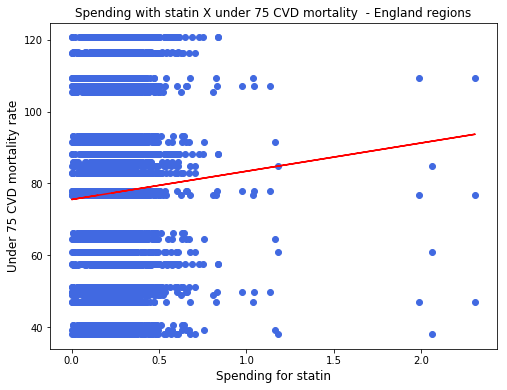

In [121]:
# Visualizing the correlation between spending with statin and mortality rate
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x = regions_StatinCVD['COST_PER_PATIENT_STATIN']
y = regions_StatinCVD['UNDER_75_CVD_MORTALITY_RATE'] 
ax.scatter(x, y, color='royalblue')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_xlabel('Spending for statin',fontsize=12)
ax.set_ylabel('Under 75 CVD mortality rate',fontsize=12)
ax.set_title('Spending with statin X under 75 CVD mortality  - England regions')

### We observe, based on the correlation matrix and the figure, that both attributes have a correlation value of 0.3, which means a <b>weak positive correlation</b>.

# Assignment D 
# Using the Google FluTrends surveillance data, pick two random countries, one in the Northern hemisphere and one in the Southern hemisphere. For each of country:

### Provide a visualisation of the seasonal patterns across all years.

In [122]:
# First chosen country: Brazil
url_br = 'https://www.google.org/flutrends/about/data/flu/br/data.txt'

# set header=8 to properly extract the data
brazilFluTrends = pd.read_csv(url_br, sep=',', header = 8)
brazilFluTrends['Date'] = pd.to_datetime(brazilFluTrends['Date'])
brazilFluTrends.head(20)

,Date,Brazil,Ceará,Distrito Federal,Minas Gerais,Paraná,Rio de Janeiro,Rio Grande do Sul,Santa Catarina,São Paulo
0,2002-12-29,174,NaN,NaN,NaN,NaN,180,NaN,NaN,167
1,2003-01-05,162,NaN,NaN,NaN,NaN,169,NaN,NaN,164
2,2003-01-12,174,NaN,NaN,NaN,NaN,178,NaN,NaN,161
3,2003-01-19,162,NaN,185.0,226.0,NaN,149,NaN,NaN,163
4,2003-01-26,131,NaN,169.0,195.0,NaN,111,NaN,NaN,143
5,2003-02-02,151,NaN,145.0,170.0,NaN,231,NaN,NaN,140
6,2003-02-09,184,NaN,162.0,172.0,NaN,148,NaN,NaN,191
7,2003-02-16,162,NaN,161.0,152.0,NaN,137,NaN,NaN,155
8,2003-02-23,194,NaN,201.0,234.0,NaN,246,NaN,NaN,187
9,2003-03-02,177,NaN,242.0,247.0,NaN,201,NaN,NaN,159


In [123]:
# Second chosen country: Germany
url_de = 'https://www.google.org/flutrends/about/data/flu/de/data.txt'

# set header=8 to properly extract the data
germanyFluTrends = pd.read_csv(url_de, sep=',', header=8)
germanyFluTrends['Date'] = pd.to_datetime(germanyFluTrends['Date'])
germanyFluTrends.head()

,Date,Germany,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
0,2003-09-28,839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,876,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-10-05,1040,1207.0,1306.0,NaN,NaN,NaN,NaN,1246.0,NaN,NaN,995,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-10-12,1171,1407.0,1432.0,NaN,NaN,NaN,NaN,1293.0,NaN,946.0,1248,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-10-19,1310,1579.0,1562.0,1013.0,NaN,NaN,972.0,1238.0,NaN,1126.0,1488,1329.0,NaN,838.0,NaN,NaN,NaN
4,2003-10-26,1210,1429.0,1431.0,1013.0,NaN,NaN,1085.0,1289.0,NaN,1061.0,1332,1334.0,NaN,946.0,NaN,NaN,NaN


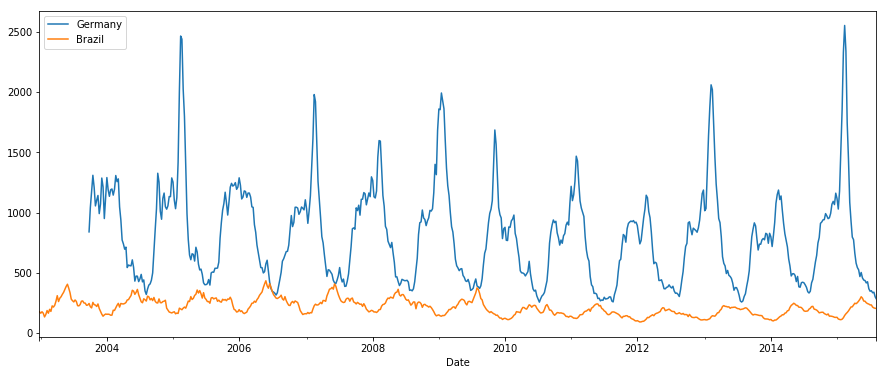

In [124]:
# Plotting the seasonal patterns for both countries
ax = germanyFluTrends.plot(legend ='left', x='Date', y = 'Germany', figsize=(15, 6), grid=True)
brazilFluTrends.plot(x='Date', y = 'Brazil' , ax=ax)

### Plotting specific information from each country

Text(0.5,0,'Year')

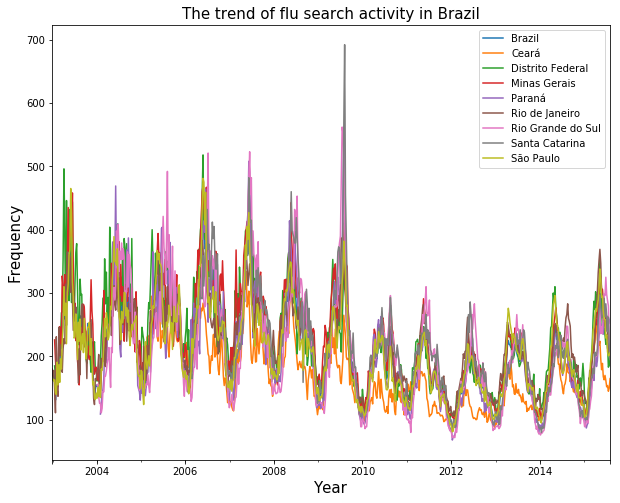

In [125]:
# First chosen country: Brazil
fig_br = brazilFluTrends.plot(x='Date', figsize=(10,8))
fig_br.set_title('The trend of flu search activity in Brazil',fontsize=15)
fig_br.set_ylabel('Frequency',fontsize=15)
fig_br.set_xlabel('Year',fontsize=15)

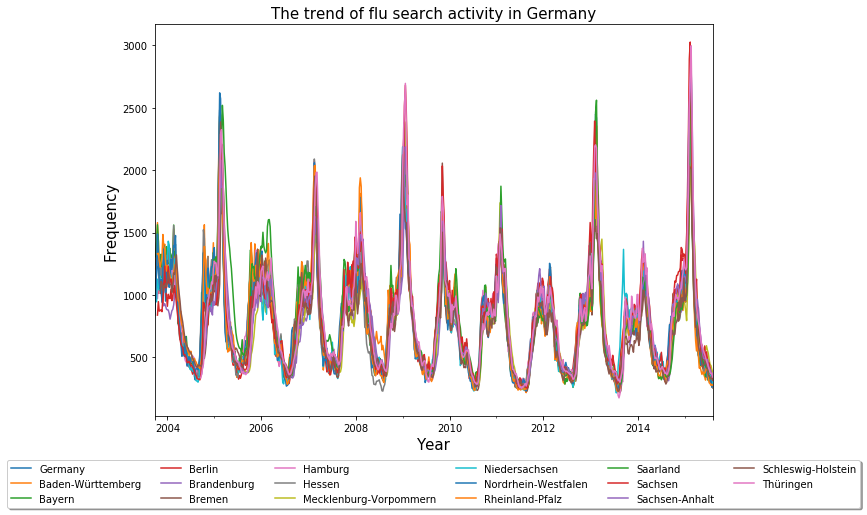

In [126]:
# First chosen country: Germany
fig_de = germanyFluTrends.plot(x='Date', figsize=(10,8))
fig_de.set_title('The trend of flu search activity in Germany',fontsize=15)
fig_de.set_ylabel('Frequency',fontsize=15)
fig_de.set_xlabel('Year',fontsize=15)

# Shrink current axis's height by 10% on the bottom
box = fig_de.get_position()
fig_de.set_position([box.x0, box.y0 + box.height * 0.1, box.width, box.height * 0.9])

# Put a legend below current axis
fig_de.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10), fancybox=True, shadow=True, ncol=6)

### Calculate the yearly minimum and maximum for each country.

### For the first chosen country (Brazil), the solution:<br>
<ol>
<li>Removes column 'Brazil' from the dataset (to calculate only over the other columns).
<li>Groups the dataset by Year and selects the minimum values for each year (column Minimum).
<li>Do the same for the maximum values (column Maximum)
<li>Prints the year and the associated minimum and maximum values.
</ol>

In [127]:
# Droping column 'Brazil' to calculate over the remaining columns
brazil_FluTrends = brazilFluTrends.drop('Brazil', axis=1)
brazil_FluTrends

,Date,Ceará,Distrito Federal,Minas Gerais,Paraná,Rio de Janeiro,Rio Grande do Sul,Santa Catarina,São Paulo
0,2002-12-29,NaN,NaN,NaN,NaN,180,NaN,NaN,167
1,2003-01-05,NaN,NaN,NaN,NaN,169,NaN,NaN,164
2,2003-01-12,NaN,NaN,NaN,NaN,178,NaN,NaN,161
3,2003-01-19,NaN,185.0,226.0,NaN,149,NaN,NaN,163
4,2003-01-26,NaN,169.0,195.0,NaN,111,NaN,NaN,143
5,2003-02-02,NaN,145.0,170.0,NaN,231,NaN,NaN,140
6,2003-02-09,NaN,162.0,172.0,NaN,148,NaN,NaN,191
7,2003-02-16,NaN,161.0,152.0,NaN,137,NaN,NaN,155
8,2003-02-23,NaN,201.0,234.0,NaN,246,NaN,NaN,187
9,2003-03-02,NaN,242.0,247.0,NaN,201,NaN,NaN,159


In [128]:
# Grouping by year...
brazil_FluTrends = brazil_FluTrends.groupby([brazil_FluTrends['Date'].dt.year]).min()
# ...and calculating the minimum values for each year => column 'Minimum'
brazil_FluTrends['Minimum'] = brazil_FluTrends.loc[:, ['Ceará','Distrito Federal','Minas Gerais','Paraná','Rio de Janeiro','Rio Grande do Sul','Santa Catarina','São Paulo']].min(axis=1)
brazil_FluTrends

,Date,Ceará,Distrito Federal,Minas Gerais,Paraná,Rio de Janeiro,Rio Grande do Sul,Santa Catarina,São Paulo,Minimum
Date,,,,,,,,,,
2002,2002-12-29,NaN,NaN,NaN,NaN,180,NaN,NaN,167,167.0
2003,2003-01-05,NaN,145.0,152.0,NaN,111,NaN,NaN,132,111.0
2004,2004-01-04,NaN,161.0,136.0,109.0,140,111.0,NaN,134,109.0
2005,2005-01-02,150.0,152.0,154.0,138.0,162,137.0,NaN,124,124.0
2006,2006-01-01,127.0,175.0,142.0,131.0,144,119.0,144.0,141,119.0
2007,2007-01-07,114.0,160.0,169.0,131.0,173,115.0,149.0,145,114.0
2008,2008-01-06,108.0,161.0,155.0,119.0,157,122.0,126.0,141,108.0
2009,2009-01-04,109.0,123.0,120.0,98.0,128,89.0,105.0,112,89.0
2010,2010-01-03,97.0,116.0,114.0,93.0,108,86.0,109.0,107,86.0


In [129]:
# Grouping by year...
brazil_FluTrends = brazil_FluTrends.groupby([brazil_FluTrends['Date'].dt.year]).max()
# ...and calculating the maximum values for each year => column 'Maximum'
brazil_FluTrends['Maximum'] = brazil_FluTrends.loc[:, ['Ceará','Distrito Federal','Minas Gerais','Paraná','Rio de Janeiro','Rio Grande do Sul','Santa Catarina','São Paulo']].max(axis=1)
brazil_FluTrends

,Date,Ceará,Distrito Federal,Minas Gerais,Paraná,Rio de Janeiro,Rio Grande do Sul,Santa Catarina,São Paulo,Minimum,Maximum
Date,,,,,,,,,,,
2002,2002-12-29,NaN,NaN,NaN,NaN,180,NaN,NaN,167,167.0,180.0
2003,2003-01-05,NaN,145.0,152.0,NaN,111,NaN,NaN,132,111.0,152.0
2004,2004-01-04,NaN,161.0,136.0,109.0,140,111.0,NaN,134,109.0,161.0
2005,2005-01-02,150.0,152.0,154.0,138.0,162,137.0,NaN,124,124.0,162.0
2006,2006-01-01,127.0,175.0,142.0,131.0,144,119.0,144.0,141,119.0,175.0
2007,2007-01-07,114.0,160.0,169.0,131.0,173,115.0,149.0,145,114.0,173.0
2008,2008-01-06,108.0,161.0,155.0,119.0,157,122.0,126.0,141,108.0,161.0
2009,2009-01-04,109.0,123.0,120.0,98.0,128,89.0,105.0,112,89.0,128.0
2010,2010-01-03,97.0,116.0,114.0,93.0,108,86.0,109.0,107,86.0,116.0


In [130]:
brazil_AggTrends = pd.DataFrame(brazil_FluTrends.index)
brazil_AggTrends.insert(1,'Minimum',brazil_FluTrends['Minimum'].values)
brazil_AggTrends.insert(2,'Maximum',brazil_FluTrends['Maximum'].values)
print('Minimum and maximum flu trends for Brazil:')
brazil_AggTrends

Minimum and maximum flu trends for Brazil:


,Date,Minimum,Maximum
0,2002,167.0,180.0
1,2003,111.0,152.0
2,2004,109.0,161.0
3,2005,124.0,162.0
4,2006,119.0,175.0
5,2007,114.0,173.0
6,2008,108.0,161.0
7,2009,89.0,128.0
8,2010,86.0,116.0
9,2011,80.0,114.0


### For the second chosen country (Germany), the solution:<br>
<ol>
<li>Removes column 'Germany' from the dataset (to calculate only over the other columns).
<li>Groups the dataset by Year and selects the minimum values for each year (column Minimum).
<li>Do the same for the maximum values (column Maximum)
<li>Prints the year and the associated minimum and maximum values.
</ol>

In [131]:
# Droping column 'Germany' to calculate over the remaining columns
germany_FluTrends = germanyFluTrends.drop('Germany', axis=1)
germany_FluTrends

,Date,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen
0,2003-09-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,876,NaN,NaN,NaN,NaN,NaN,NaN
1,2003-10-05,1207.0,1306.0,NaN,NaN,NaN,NaN,1246.0,NaN,NaN,995,NaN,NaN,NaN,NaN,NaN,NaN
2,2003-10-12,1407.0,1432.0,NaN,NaN,NaN,NaN,1293.0,NaN,946.0,1248,NaN,NaN,NaN,NaN,NaN,NaN
3,2003-10-19,1579.0,1562.0,1013.0,NaN,NaN,972.0,1238.0,NaN,1126.0,1488,1329.0,NaN,838.0,NaN,NaN,NaN
4,2003-10-26,1429.0,1431.0,1013.0,NaN,NaN,1085.0,1289.0,NaN,1061.0,1332,1334.0,NaN,946.0,NaN,NaN,NaN
5,2003-11-02,1214.0,1112.0,1087.0,NaN,NaN,1152.0,1136.0,NaN,1038.0,1097,1271.0,NaN,870.0,NaN,NaN,NaN
6,2003-11-09,1241.0,1284.0,1034.0,NaN,NaN,1138.0,1233.0,NaN,1150.0,1048,1222.0,NaN,874.0,NaN,1013.0,NaN
7,2003-11-16,1230.0,1326.0,1024.0,NaN,NaN,1074.0,1150.0,NaN,1119.0,1123,1262.0,NaN,881.0,NaN,1109.0,NaN
8,2003-11-23,1199.0,970.0,959.0,NaN,NaN,1132.0,1220.0,NaN,1051.0,942,1303.0,NaN,866.0,NaN,1095.0,NaN
9,2003-11-30,1083.0,1108.0,924.0,939.0,NaN,1134.0,1153.0,NaN,1117.0,1186,1484.0,NaN,977.0,NaN,1031.0,NaN


In [132]:
# Grouping by year...
germany_FluTrends = germany_FluTrends.groupby([germany_FluTrends['Date'].dt.year]).min()
# ...and calculating the minimum values for each year => column 'Minimum'
germany_FluTrends['Minimum'] = germany_FluTrends.loc[:, ['Baden-Württemberg','Bayern','Berlin','Brandenburg','Bremen','Hamburg','Hessen','Mecklenburg-Vorpommern','Niedersachsen','Nordrhein-Westfalen','Rheinland-Pfalz','Saarland','Sachsen','Sachsen-Anhalt','Schleswig-Holstein','Thüringen']].min(axis=1)
germany_FluTrends

,Date,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Minimum
Date,,,,,,,,,,,,,,,,,,
2003,2003-09-28,1083.0,970.0,924.0,886.0,NaN,972.0,1136.0,NaN,946.0,876,1191.0,NaN,838.0,NaN,1013.0,NaN,838.0
2004,2004-01-04,378.0,337.0,344.0,360.0,492.0,377.0,327.0,NaN,301.0,374,410.0,766.0,319.0,418.0,420.0,335.0,301.0
2005,2005-01-02,340.0,361.0,325.0,375.0,449.0,377.0,339.0,376.0,379.0,393,402.0,517.0,399.0,367.0,416.0,361.0,325.0
2006,2006-01-01,287.0,340.0,290.0,338.0,356.0,323.0,342.0,376.0,282.0,269,284.0,341.0,337.0,334.0,326.0,362.0,269.0
2007,2007-01-07,358.0,375.0,352.0,374.0,401.0,406.0,368.0,380.0,330.0,367,377.0,421.0,360.0,416.0,336.0,440.0,330.0
2008,2008-01-06,413.0,357.0,334.0,356.0,383.0,352.0,229.0,343.0,309.0,314,298.0,391.0,350.0,392.0,349.0,386.0,229.0
2009,2009-01-04,342.0,365.0,336.0,316.0,341.0,359.0,336.0,347.0,322.0,298,306.0,352.0,401.0,368.0,338.0,301.0,298.0
2010,2010-01-03,280.0,260.0,241.0,269.0,235.0,270.0,260.0,280.0,230.0,245,235.0,314.0,299.0,275.0,264.0,286.0,230.0
2011,2011-01-02,217.0,248.0,248.0,260.0,229.0,299.0,252.0,245.0,238.0,232,241.0,273.0,254.0,253.0,268.0,252.0,217.0


In [133]:
# Grouping by year...
germany_FluTrends = germany_FluTrends.groupby([germany_FluTrends['Date'].dt.year]).max()
# ...and calculating the maximum values for each year => column 'Maximum'
germany_FluTrends['Maximum'] = germany_FluTrends.loc[:, ['Baden-Württemberg','Bayern','Berlin','Brandenburg','Bremen','Hamburg','Hessen','Mecklenburg-Vorpommern','Niedersachsen','Nordrhein-Westfalen','Rheinland-Pfalz','Saarland','Sachsen','Sachsen-Anhalt','Schleswig-Holstein','Thüringen']].max(axis=1)
germany_FluTrends

,Date,Baden-Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg-Vorpommern,Niedersachsen,Nordrhein-Westfalen,Rheinland-Pfalz,Saarland,Sachsen,Sachsen-Anhalt,Schleswig-Holstein,Thüringen,Minimum,Maximum
Date,,,,,,,,,,,,,,,,,,,
2003,2003-09-28,1083.0,970.0,924.0,886.0,NaN,972.0,1136.0,NaN,946.0,876,1191.0,NaN,838.0,NaN,1013.0,NaN,838.0,1191.0
2004,2004-01-04,378.0,337.0,344.0,360.0,492.0,377.0,327.0,NaN,301.0,374,410.0,766.0,319.0,418.0,420.0,335.0,301.0,766.0
2005,2005-01-02,340.0,361.0,325.0,375.0,449.0,377.0,339.0,376.0,379.0,393,402.0,517.0,399.0,367.0,416.0,361.0,325.0,517.0
2006,2006-01-01,287.0,340.0,290.0,338.0,356.0,323.0,342.0,376.0,282.0,269,284.0,341.0,337.0,334.0,326.0,362.0,269.0,376.0
2007,2007-01-07,358.0,375.0,352.0,374.0,401.0,406.0,368.0,380.0,330.0,367,377.0,421.0,360.0,416.0,336.0,440.0,330.0,440.0
2008,2008-01-06,413.0,357.0,334.0,356.0,383.0,352.0,229.0,343.0,309.0,314,298.0,391.0,350.0,392.0,349.0,386.0,229.0,413.0
2009,2009-01-04,342.0,365.0,336.0,316.0,341.0,359.0,336.0,347.0,322.0,298,306.0,352.0,401.0,368.0,338.0,301.0,298.0,401.0
2010,2010-01-03,280.0,260.0,241.0,269.0,235.0,270.0,260.0,280.0,230.0,245,235.0,314.0,299.0,275.0,264.0,286.0,230.0,314.0
2011,2011-01-02,217.0,248.0,248.0,260.0,229.0,299.0,252.0,245.0,238.0,232,241.0,273.0,254.0,253.0,268.0,252.0,217.0,299.0


In [134]:
germany_AggTrends = pd.DataFrame(germany_FluTrends.index)
germany_AggTrends.insert(1,'Minimum',germany_FluTrends['Minimum'].values)
germany_AggTrends.insert(2,'Maximum',germany_FluTrends['Maximum'].values)
print('Minimum and maximum flu trends for Germany:')
germany_AggTrends

Minimum and maximum flu trends for Germany:


,Date,Minimum,Maximum
0,2003,838.0,1191.0
1,2004,301.0,766.0
2,2005,325.0,517.0
3,2006,269.0,376.0
4,2007,330.0,440.0
5,2008,229.0,413.0
6,2009,298.0,401.0
7,2010,230.0,314.0
8,2011,217.0,299.0
9,2012,259.0,338.0


### Provide and plot a reasonable mathematical function that could be used as an approximation for the seasonal trend for each country.

Linear trends can be summarized by a linear model, and nonlinear trends may be best summarized using a polynomial or other curve-fitting method.